In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Charger les données depuis le fichier Excel
file_path = '../Clean_data/Appareils_all.xlsx'
df_appareils = pd.read_excel(file_path)


# Filtrer uniquement les données de la catégorie "Global"
df_global = df_appareils[df_appareils['Source'] == 'Global'].copy()



=== Performance par appareil (catégorie Global uniquement) ===
      Appareil   Clics  Impressions  CTR_calculé  Position  \
12      Mobile  408346     21087244       0.0194     13.94   
13  Ordinateur  255313     17067753       0.0150     27.67   
14    Tablette   12652       318293       0.0397      8.17   

    Pourcentage_impressions   Fiabilité  
12                    54.81  Excellente  
13                    44.36  Excellente  
14                     0.83  Excellente  


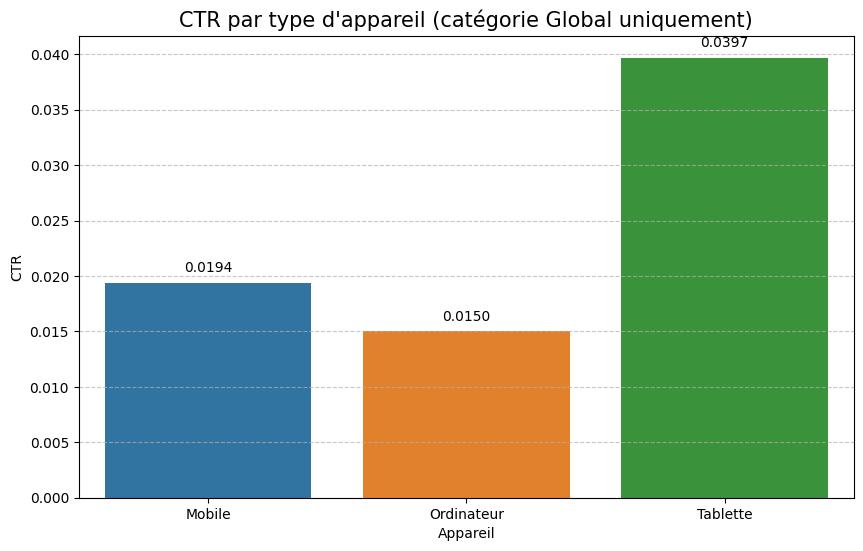

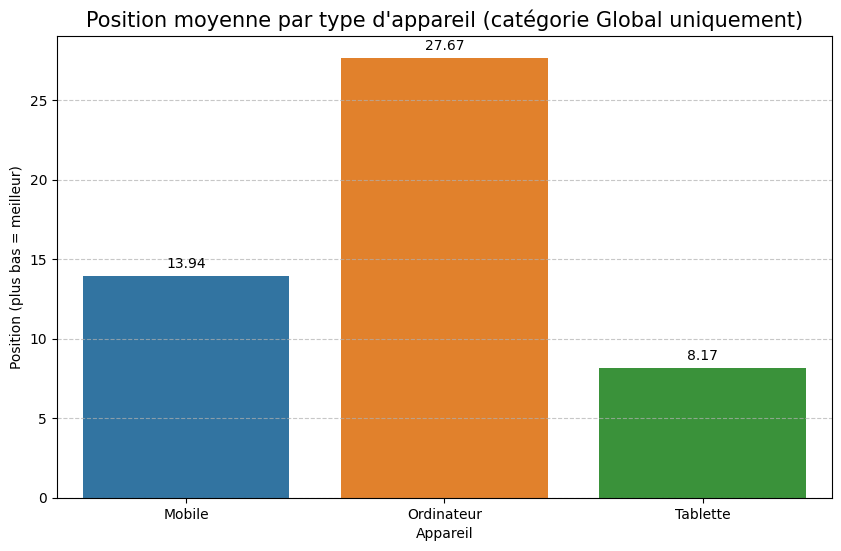

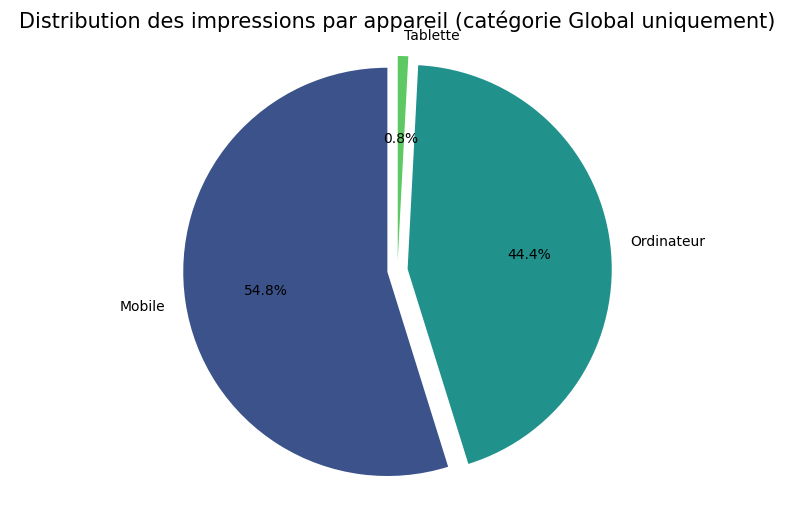

In [10]:
# 1. Tableau récapitulatif des performances par appareil (Global uniquement)
# Calculer le CTR correctement
df_global['CTR_calculé'] = (df_global['Clics'] / df_global['Impressions']).round(4)

# Ajouter la fiabilité
def categoriser_fiabilite(impressions):
    if impressions > 10000:
        return 'Excellente'
    elif impressions > 1000:
        return 'Bonne'
    elif impressions > 100:
        return 'Moyenne'
    elif impressions > 10:
        return 'Faible'
    else:
        return 'Très faible'

df_global['Fiabilité'] = df_global['Impressions'].apply(categoriser_fiabilite)

# Calculer le pourcentage d'impressions par rapport au total
total_impressions_global = df_global['Impressions'].sum()
df_global['Pourcentage_impressions'] = (df_global['Impressions'] / total_impressions_global * 100).round(2)

# Tri par volume d'impressions décroissant
df_global_sorted = df_global.sort_values('Impressions', ascending=False)

print("=== Performance par appareil (catégorie Global uniquement) ===")
print(df_global_sorted[['Appareil', 'Clics', 'Impressions', 'CTR_calculé', 'Position', 'Pourcentage_impressions', 'Fiabilité']])

# 2. Visualisation du CTR par appareil
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Appareil', 
    y='CTR_calculé', 
    hue='Appareil',
    legend=False,
    data=df_global_sorted
)
plt.title('CTR par type d\'appareil (catégorie Global uniquement)', fontsize=15)
plt.ylabel('CTR')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajouter les valeurs sur les barres
for i, row in enumerate(df_global_sorted.itertuples()):
    plt.text(i, row.CTR_calculé + 0.001, f"{row.CTR_calculé:.4f}", ha='center')

plt.savefig('../assets/ctr_par_appareil_global_only.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Visualisation de la position moyenne par appareil
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Appareil', 
    y='Position', 
    hue='Appareil',
    legend=False,
    data=df_global_sorted
)
plt.title('Position moyenne par type d\'appareil (catégorie Global uniquement)', fontsize=15)
plt.ylabel('Position (plus bas = meilleur)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajouter les valeurs sur les barres
for i, row in enumerate(df_global_sorted.itertuples()):
    plt.text(i, row.Position + 0.5, f"{row.Position:.2f}", ha='center')

plt.savefig('../assets/position_par_appareil_global_only.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Visualisation de la distribution des impressions
plt.figure(figsize=(10, 6))
plt.pie(
    df_global_sorted['Impressions'], 
    labels=df_global_sorted['Appareil'],
    autopct='%1.1f%%',
    startangle=90,
    explode=[0.05] * len(df_global_sorted),  # Légère séparation pour tous les segments
    colors=sns.color_palette('viridis', len(df_global_sorted))
)
plt.title('Distribution des impressions par appareil (catégorie Global uniquement)', fontsize=15)
plt.axis('equal')  # Pour s'assurer que le pie est circulaire
plt.savefig('../assets/distribution_impressions_global_only.png', dpi=300, bbox_inches='tight')
plt.show()

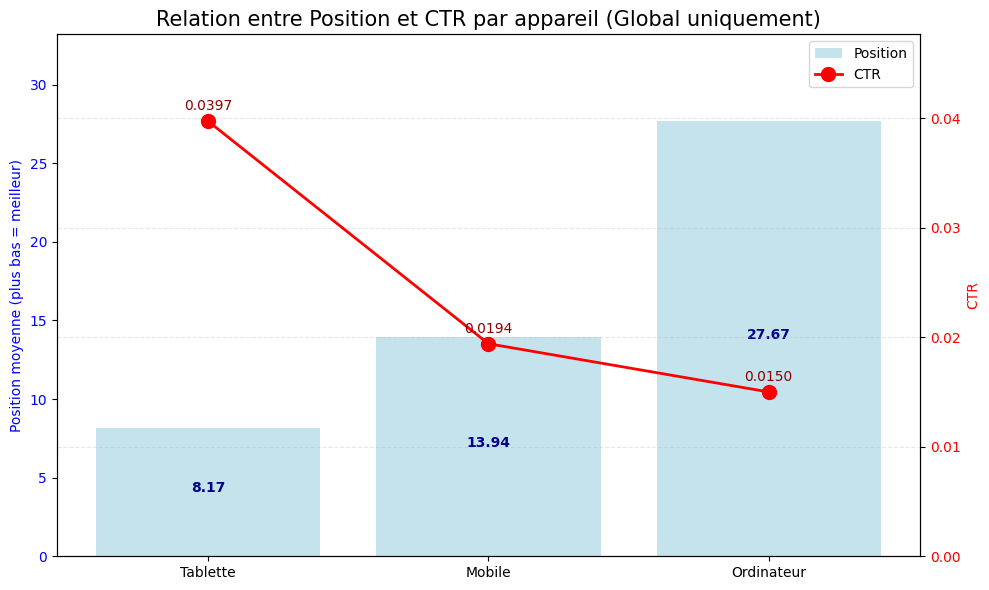


=== Analyse de la relation Position vs CTR (Global uniquement) ===
      Appareil  Position  Position Rang  CTR_calculé  CTR Rang  Cohérence  \
12      Mobile     13.94              2       0.0194         2       True   
13  Ordinateur     27.67              3       0.0150         3       True   
14    Tablette      8.17              1       0.0397         1       True   

    % des impressions  
12              54.81  
13              44.36  
14               0.83  


In [7]:
# Créer un graphique qui montre clairement la relation entre position et CTR
plt.figure(figsize=(10, 6))

# Trier les données par position (de la meilleure à la moins bonne)
df_sorted = df_global_sorted.sort_values('Position')

# Créer des barres pour les valeurs de position (axe gauche)
ax1 = plt.gca()
ax1.bar(df_sorted['Appareil'], df_sorted['Position'], color='lightblue', alpha=0.7, label='Position')
ax1.set_ylabel('Position moyenne (plus bas = meilleur)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim([0, max(df_sorted['Position']) * 1.2])

# Créer un axe secondaire pour le CTR (axe droit)
ax2 = ax1.twinx()
ax2.plot(df_sorted['Appareil'], df_sorted['CTR_calculé'], 'ro-', linewidth=2, markersize=10, label='CTR')
ax2.set_ylabel('CTR', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim([0, max(df_sorted['CTR_calculé']) * 1.2])

# Ajouter les valeurs de position sur les barres
for i, v in enumerate(df_sorted['Position']):
    ax1.text(i, v/2, f"{v:.2f}", ha='center', color='darkblue', fontweight='bold')

# Ajouter les valeurs de CTR sur les points
for i, v in enumerate(df_sorted['CTR_calculé']):
    ax2.text(i, v + 0.001, f"{v:.4f}", ha='center', color='darkred')

# Ajouter un titre et une légende
plt.title('Relation entre Position et CTR par appareil (Global uniquement)', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Combiner les légendes des deux axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.savefig('../assets/position_ctr_relation_global_only.png', dpi=300, bbox_inches='tight')
plt.show()

# Créer aussi un tableau pour montrer clairement la relation
relation_table = df_global_sorted[['Appareil', 'Position', 'CTR_calculé', 'Impressions']].copy()
relation_table['% des impressions'] = (relation_table['Impressions'] / relation_table['Impressions'].sum() * 100).round(2)

# Calculer si le CTR est cohérent avec la position (meilleure position = meilleur CTR ?)
relation_table['Position Rang'] = relation_table['Position'].rank().astype(int)
relation_table['CTR Rang'] = relation_table['CTR_calculé'].rank(ascending=False).astype(int)
relation_table['Cohérence'] = relation_table['Position Rang'] == relation_table['CTR Rang']

print("\n=== Analyse de la relation Position vs CTR (Global uniquement) ===")
print(relation_table[['Appareil', 'Position', 'Position Rang', 'CTR_calculé', 'CTR Rang', 'Cohérence', '% des impressions']])

## Une cohérence parfaite entre position et CTR: 

La "cohérence" dans cette analyse représente la correspondance entre le classement (rang) des appareils selon leur position moyenne et le classement selon leur CTR.
Une cohérence parfaite (True) signifie que le classement des appareils est le même qu'on les ordonne par position ou par CTR. Par exemple, si la Tablette a le rang 1 pour la position et le rang 1 pour le CTR, alors sa cohérence est True.


Pour les trois types d'appareils, le rang de la position correspond exactement au rang du CTR (colonne "Cohérence" = True). Cela confirme la règle SEO fondamentale: une meilleure position dans les résultats de recherche entraîne un meilleur taux de clics.


## Tablette: performance supérieure:

Meilleure position moyenne (8.17)

Meilleur CTR (0.0397, soit 3.97%)

Cependant, volume très faible (seulement 0.83% des impressions)


## Mobile: bon équilibre performance/volume:

Position correcte (13.94, 2ème rang)

CTR respectable (0.0194, soit 1.94%, 2ème rang)

Volume dominant (54.81% des impressions)


## Ordinateur: performance inférieure mais volume important:

Position la moins bonne (27.67)

CTR le plus faible (0.0150, soit 1.50%)

Volume substantiel (44.36% des impressions)



## Implications stratégiques:

Le comportement des utilisateurs est cohérent à travers les appareils: meilleure position = meilleur CTR

La tablette offre le meilleur ratio position/CTR, mais son volume est marginal

Les efforts d'optimisation devraient se concentrer prioritairement sur Mobile et Ordinateur qui représentent 99% du trafic

L'écart de position entre Mobile (13.94) et Ordinateur (27.67) est significatif et pourrait expliquer la différence de CTR

L'amélioration du positionnement sur Ordinateur pourrait avoir un impact substantiel sur le CTR global

=== Performance par type d'apparence (catégorie Global uniquement) ===
   Apparence_dans_les_résultats_de_recherche   Clics  Impressions  \
7                             Extrait d'avis  209888      6449490   
8                       Extraits de produits   10996       610625   
9                         Résultats traduits     190        11909   
10                                    Vidéos       0           32   

    CTR_calculé  Position  Pourcentage_impressions   Fiabilité  
7        0.0325     27.17                    91.20  Excellente  
8        0.0180     27.56                     8.63  Excellente  
9        0.0160     11.11                     0.17  Excellente  
10       0.0000      5.50                     0.00      Faible  


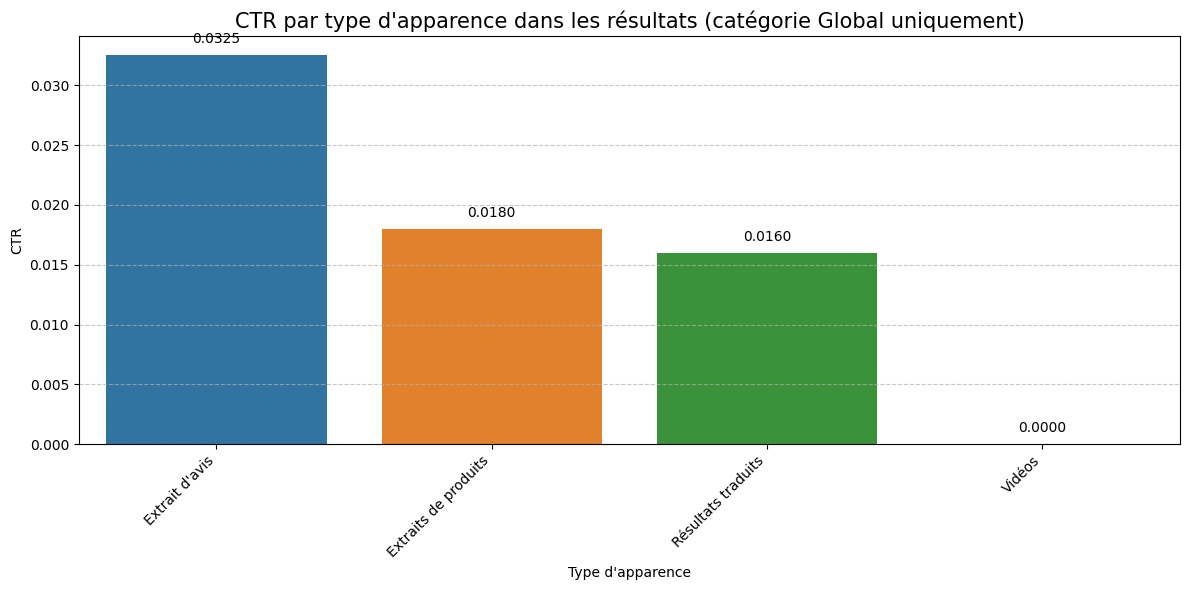

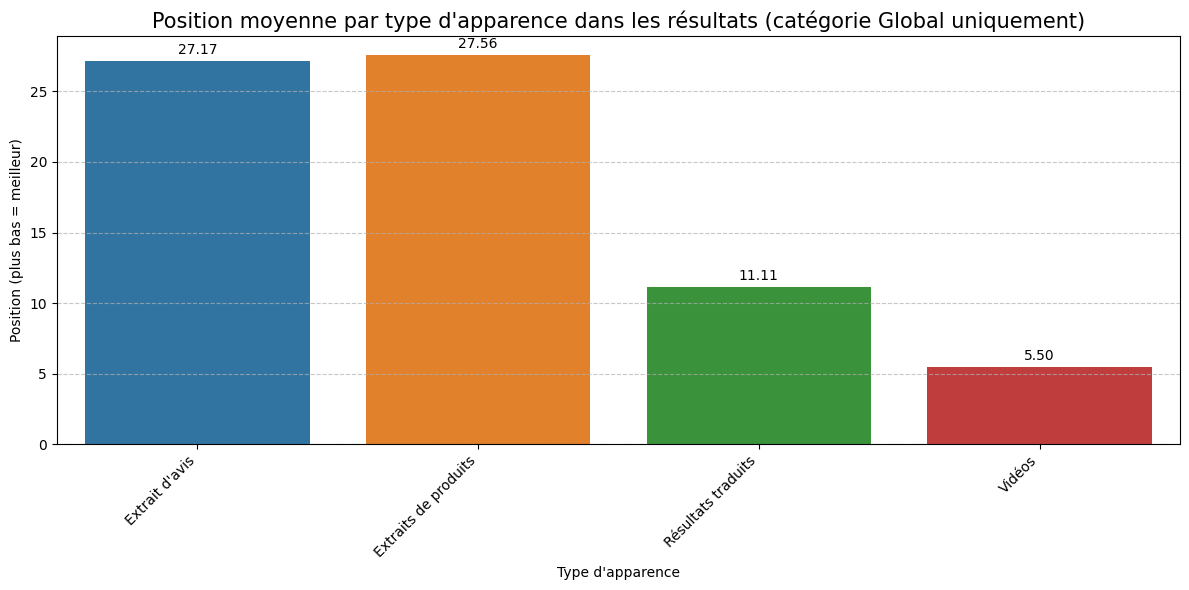

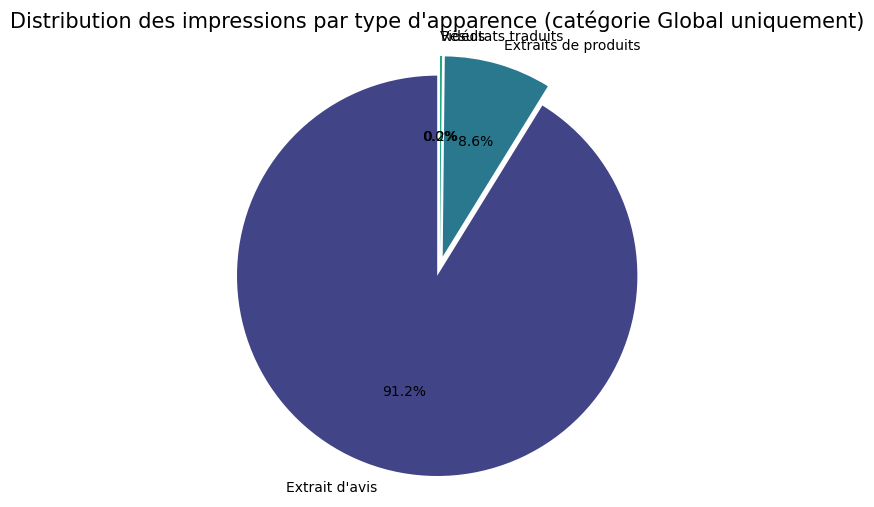


=== Analyse de la relation Position vs CTR par type d'apparence (Global uniquement) ===
   Apparence_dans_les_résultats_de_recherche  Position  Position Rang  \
7                             Extrait d'avis     27.17              3   
8                       Extraits de produits     27.56              4   
9                         Résultats traduits     11.11              2   
10                                    Vidéos      5.50              1   

    CTR_calculé  CTR Rang  Cohérence  % des impressions  
7        0.0325         1      False              91.20  
8        0.0180         2      False               8.63  
9        0.0160         3      False               0.17  
10       0.0000         4      False               0.00  


In [ ]:

# Charger les données depuis le fichier Excel
file_path = '../Clean_data/Apparence_dans_les_résultats_de_recherche_all.xlsx'
df = pd.read_excel(file_path)

# Filtrer uniquement les données de la catégorie "Global"
df_global = df[df['Source'] == 'Global'].copy()

# 1. Tableau récapitulatif des performances par type d'apparence (Global uniquement)
# Calculer le CTR correctement
df_global['CTR_calculé'] = (df_global['Clics'] / df_global['Impressions']).round(4)

# Ajouter la fiabilité
def categoriser_fiabilite(impressions):
    if impressions > 10000:
        return 'Excellente'
    elif impressions > 1000:
        return 'Bonne'
    elif impressions > 100:
        return 'Moyenne'
    elif impressions > 10:
        return 'Faible'
    else:
        return 'Très faible'

df_global['Fiabilité'] = df_global['Impressions'].apply(categoriser_fiabilite)

# Calculer le pourcentage d'impressions par rapport au total
total_impressions_global = df_global['Impressions'].sum()
df_global['Pourcentage_impressions'] = (df_global['Impressions'] / total_impressions_global * 100).round(2)

# Tri par volume d'impressions décroissant
df_global_sorted = df_global.sort_values('Impressions', ascending=False)

print("=== Performance par type d'apparence (catégorie Global uniquement) ===")
print(df_global_sorted[['Apparence_dans_les_résultats_de_recherche', 'Clics', 'Impressions', 'CTR_calculé', 'Position', 'Pourcentage_impressions', 'Fiabilité']])

# 2. Visualisation du CTR par type d'apparence
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Apparence_dans_les_résultats_de_recherche', 
    y='CTR_calculé', 
    hue='Apparence_dans_les_résultats_de_recherche',
    legend=False,
    data=df_global_sorted
)
plt.title('CTR par type d\'apparence dans les résultats (catégorie Global uniquement)', fontsize=15)
plt.ylabel('CTR')
plt.xlabel('Type d\'apparence')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajouter les valeurs sur les barres
for i, row in enumerate(df_global_sorted.itertuples()):
    plt.text(i, row.CTR_calculé + 0.001, f"{row.CTR_calculé:.4f}", ha='center')

plt.tight_layout()
plt.savefig('../assets/ctr_par_apparence_global_only.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Visualisation de la position moyenne par type d'apparence
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Apparence_dans_les_résultats_de_recherche', 
    y='Position', 
    hue='Apparence_dans_les_résultats_de_recherche',
    legend=False,
    data=df_global_sorted
)
plt.title('Position moyenne par type d\'apparence dans les résultats (catégorie Global uniquement)', fontsize=15)
plt.ylabel('Position (plus bas = meilleur)')
plt.xlabel('Type d\'apparence')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajouter les valeurs sur les barres
for i, row in enumerate(df_global_sorted.itertuples()):
    plt.text(i, row.Position + 0.5, f"{row.Position:.2f}", ha='center')

plt.tight_layout()
plt.savefig('../assets/position_par_apparence_global_only.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Visualisation de la distribution des impressions
plt.figure(figsize=(10, 6))
plt.pie(
    df_global_sorted['Impressions'], 
    labels=df_global_sorted['Apparence_dans_les_résultats_de_recherche'],
    autopct='%1.1f%%',
    startangle=90,
    explode=[0.05] * len(df_global_sorted),  # Légère séparation pour tous les segments
    colors=sns.color_palette('viridis', len(df_global_sorted))
)
plt.title('Distribution des impressions par type d\'apparence (catégorie Global uniquement)', fontsize=15)
plt.axis('equal')  # Pour s'assurer que le pie est circulaire
plt.savefig('../assets/distribution_impressions_apparence_global_only.png', dpi=300, bbox_inches='tight')
plt.show()

# Analyser la relation entre position et CTR (tableau uniquement)
relation_table = df_global_sorted[['Apparence_dans_les_résultats_de_recherche', 'Position', 'CTR_calculé', 'Impressions']].copy()
relation_table['% des impressions'] = (relation_table['Impressions'] / relation_table['Impressions'].sum() * 100).round(2)

# Calculer si le CTR est cohérent avec la position (meilleure position = meilleur CTR ?)
relation_table['Position Rang'] = relation_table['Position'].rank().astype(int)
relation_table['CTR Rang'] = relation_table['CTR_calculé'].rank(ascending=False).astype(int)
relation_table['Cohérence'] = relation_table['Position Rang'] == relation_table['CTR Rang']

print("\n=== Analyse de la relation Position vs CTR par type d'apparence (Global uniquement) ===")
print(relation_table[['Apparence_dans_les_résultats_de_recherche', 'Position', 'Position Rang', 'CTR_calculé', 'CTR Rang', 'Cohérence', '% des impressions']])

In [20]:
# Charger les données depuis le fichier Excel
file_path = '../Clean_data/Apparence_dans_les_résultats_de_recherche_all.xlsx'
df = pd.read_excel(file_path)

# Filtrer uniquement les données de la catégorie "Global"
df_global = df[df['Source'] == 'Global'].copy()

=== Performance par type d'apparence (catégorie Global uniquement) ===
   Apparence_dans_les_résultats_de_recherche   Clics  Impressions  \
7                             Extrait d'avis  209888      6449490   
8                       Extraits de produits   10996       610625   
9                         Résultats traduits     190        11909   
10                                    Vidéos       0           32   

    CTR_calculé  Position  Pourcentage_impressions   Fiabilité  
7        0.0325     27.17                    91.20  Excellente  
8        0.0180     27.56                     8.63  Excellente  
9        0.0160     11.11                     0.17  Excellente  
10       0.0000      5.50                     0.00      Faible  


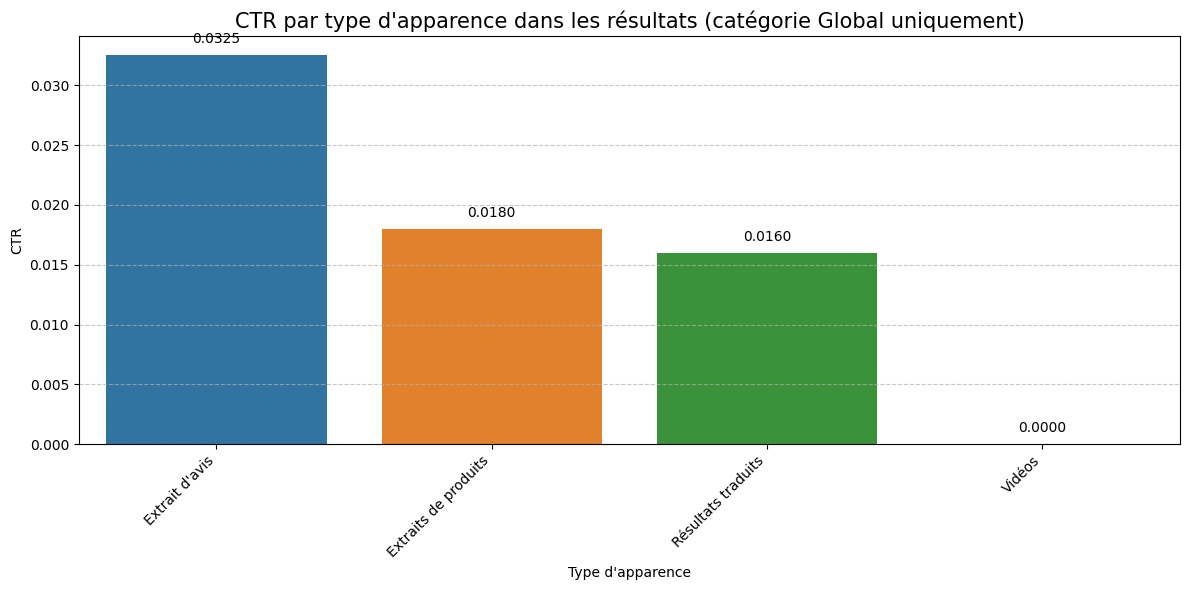

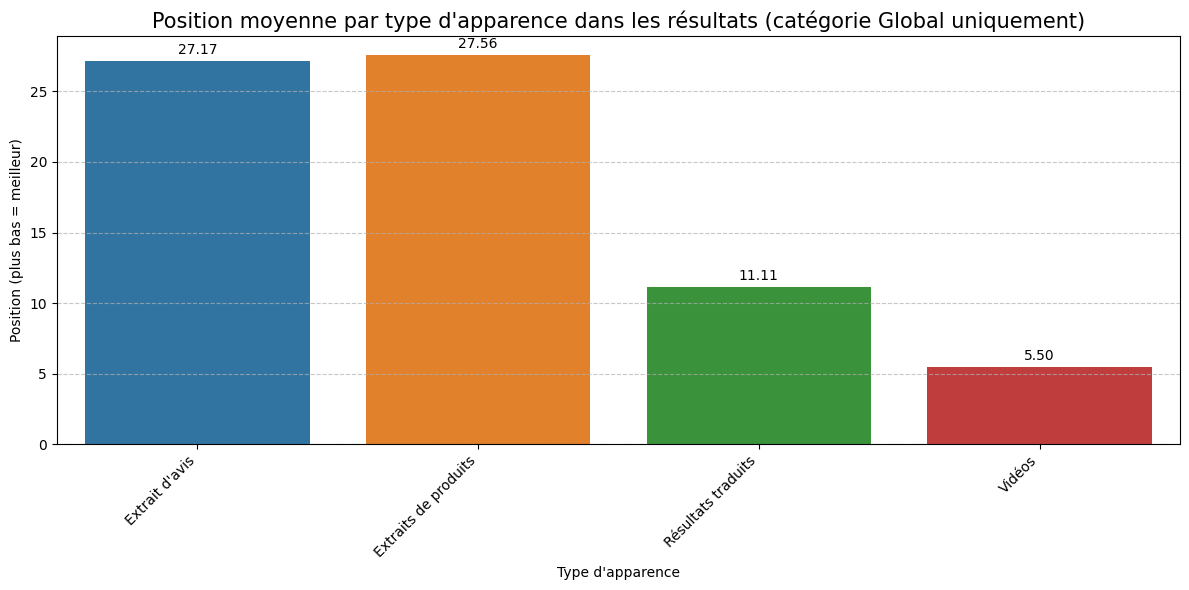

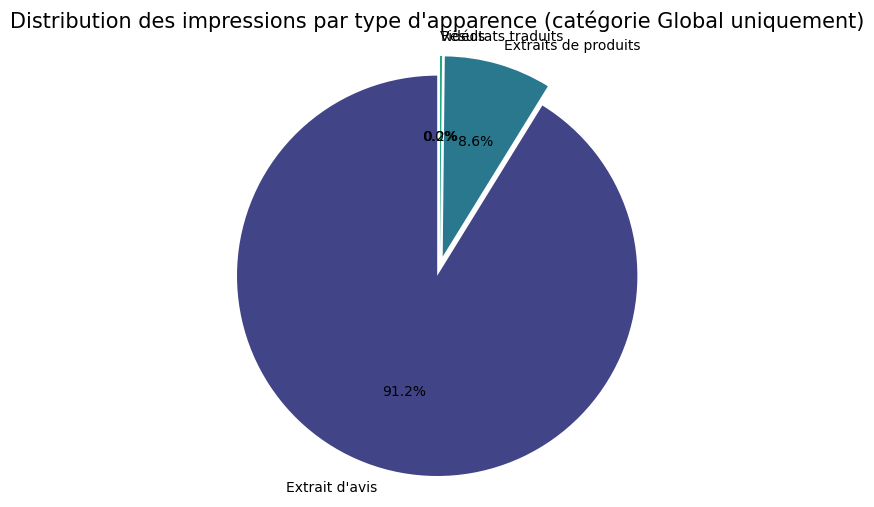

In [23]:
# 1. Tableau récapitulatif des performances par type d'apparence (Global uniquement)
# Calculer le CTR correctement
df_global['CTR_calculé'] = (df_global['Clics'] / df_global['Impressions']).round(4)

# Ajouter la fiabilité
def categoriser_fiabilite(impressions):
    if impressions > 10000:
        return 'Excellente'
    elif impressions > 1000:
        return 'Bonne'
    elif impressions > 100:
        return 'Moyenne'
    elif impressions > 10:
        return 'Faible'
    else:
        return 'Très faible'

df_global['Fiabilité'] = df_global['Impressions'].apply(categoriser_fiabilite)

# Calculer le pourcentage d'impressions par rapport au total
total_impressions_global = df_global['Impressions'].sum()
df_global['Pourcentage_impressions'] = (df_global['Impressions'] / total_impressions_global * 100).round(2)

# Tri par volume d'impressions décroissant
df_global_sorted = df_global.sort_values('Impressions', ascending=False)

print("=== Performance par type d'apparence (catégorie Global uniquement) ===")
print(df_global_sorted[['Apparence_dans_les_résultats_de_recherche', 'Clics', 'Impressions', 'CTR_calculé', 'Position', 'Pourcentage_impressions', 'Fiabilité']])

# 2. Visualisation du CTR par type d'apparence
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Apparence_dans_les_résultats_de_recherche', 
    y='CTR_calculé', 
    hue='Apparence_dans_les_résultats_de_recherche',
    legend=False,
    data=df_global_sorted
)
plt.title('CTR par type d\'apparence dans les résultats (catégorie Global uniquement)', fontsize=15)
plt.ylabel('CTR')
plt.xlabel('Type d\'apparence')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajouter les valeurs sur les barres
for i, row in enumerate(df_global_sorted.itertuples()):
    plt.text(i, row.CTR_calculé + 0.001, f"{row.CTR_calculé:.4f}", ha='center')

plt.tight_layout()
plt.savefig('../assets/ctr_par_apparence_global_only.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Visualisation de la position moyenne par type d'apparence
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Apparence_dans_les_résultats_de_recherche', 
    y='Position', 
    hue='Apparence_dans_les_résultats_de_recherche',
    legend=False,
    data=df_global_sorted
)
plt.title('Position moyenne par type d\'apparence dans les résultats (catégorie Global uniquement)', fontsize=15)
plt.ylabel('Position (plus bas = meilleur)')
plt.xlabel('Type d\'apparence')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajouter les valeurs sur les barres
for i, row in enumerate(df_global_sorted.itertuples()):
    plt.text(i, row.Position + 0.5, f"{row.Position:.2f}", ha='center')

plt.tight_layout()
plt.savefig('../assets/position_par_apparence_global_only.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Visualisation de la distribution des impressions
plt.figure(figsize=(10, 6))
plt.pie(
    df_global_sorted['Impressions'], 
    labels=df_global_sorted['Apparence_dans_les_résultats_de_recherche'],
    autopct='%1.1f%%',
    startangle=90,
    explode=[0.05] * len(df_global_sorted),  # Légère séparation pour tous les segments
    colors=sns.color_palette('viridis', len(df_global_sorted))
)
plt.title('Distribution des impressions par type d\'apparence (catégorie Global uniquement)', fontsize=15)
plt.axis('equal')  # Pour s'assurer que le pie est circulaire
plt.savefig('../assets/distribution_impressions_apparence_global_only.png', dpi=300, bbox_inches='tight')
plt.show()

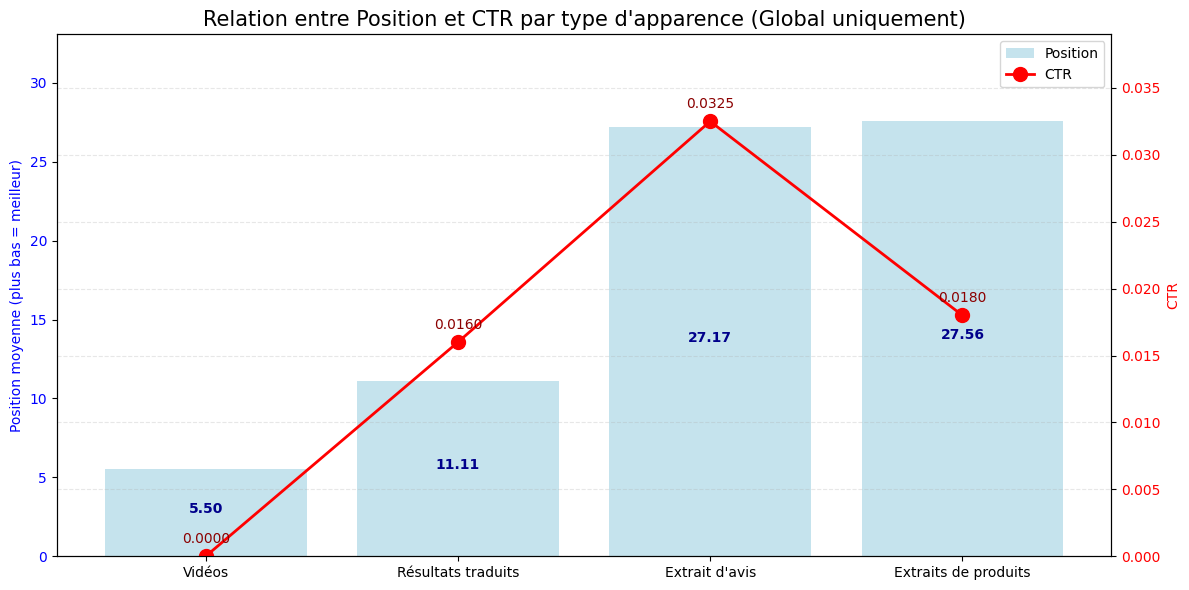


=== Analyse de la relation Position vs CTR par type d'apparence (Global uniquement) ===
   Apparence_dans_les_résultats_de_recherche  Position  Position Rang  \
7                             Extrait d'avis     27.17              3   
8                       Extraits de produits     27.56              4   
9                         Résultats traduits     11.11              2   
10                                    Vidéos      5.50              1   

    CTR_calculé  CTR Rang  Cohérence  % des impressions  
7        0.0325         1      False              91.20  
8        0.0180         2      False               8.63  
9        0.0160         3      False               0.17  
10       0.0000         4      False               0.00  


In [18]:
# Calculer le CTR correctement
df_global['CTR_calculé'] = (df_global['Clics'] / df_global['Impressions']).round(4)

# Tri par volume d'impressions
df_global_sorted = df_global.sort_values('Impressions', ascending=False)

# Graphique de relation entre position et CTR
plt.figure(figsize=(12, 6))

# Trier les données par position (de la meilleure à la moins bonne)
df_sorted = df_global_sorted.sort_values('Position')

# Créer des barres pour les valeurs de position (axe gauche)
ax1 = plt.gca()
ax1.bar(df_sorted['Apparence_dans_les_résultats_de_recherche'], df_sorted['Position'], 
       color='lightblue', alpha=0.7, label='Position')
ax1.set_ylabel('Position moyenne (plus bas = meilleur)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim([0, max(df_sorted['Position']) * 1.2])

# Créer un axe secondaire pour le CTR (axe droit)
ax2 = ax1.twinx()
ax2.plot(df_sorted['Apparence_dans_les_résultats_de_recherche'], df_sorted['CTR_calculé'], 
        'ro-', linewidth=2, markersize=10, label='CTR')
ax2.set_ylabel('CTR', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim([0, max(df_sorted['CTR_calculé']) * 1.2])

# Ajouter les valeurs de position sur les barres
for i, v in enumerate(df_sorted['Position']):
    ax1.text(i, v/2, f"{v:.2f}", ha='center', color='darkblue', fontweight='bold')

# Ajouter les valeurs de CTR sur les points
for i, v in enumerate(df_sorted['CTR_calculé']):
    ax2.text(i, v + 0.001, f"{v:.4f}", ha='center', color='darkred')

# Ajouter un titre et une légende
plt.title('Relation entre Position et CTR par type d\'apparence (Global uniquement)', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=45, ha='right')

# Combiner les légendes des deux axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.savefig('../assets/position_ctr_relation_apparence_global_only.png', dpi=300, bbox_inches='tight')
plt.show()

# Tableau d'analyse de la relation entre position et CTR
relation_table = df_global_sorted[['Apparence_dans_les_résultats_de_recherche', 'Position', 'CTR_calculé', 'Impressions']].copy()
relation_table['% des impressions'] = (relation_table['Impressions'] / relation_table['Impressions'].sum() * 100).round(2)

# Calculer si le CTR est cohérent avec la position (meilleure position = meilleur CTR ?)
relation_table['Position Rang'] = relation_table['Position'].rank().astype(int)
relation_table['CTR Rang'] = relation_table['CTR_calculé'].rank(ascending=False).astype(int)
relation_table['Cohérence'] = relation_table['Position Rang'] == relation_table['CTR Rang']

print("\n=== Analyse de la relation Position vs CTR par type d'apparence (Global uniquement) ===")
print(relation_table[['Apparence_dans_les_résultats_de_recherche', 'Position', 'Position Rang', 'CTR_calculé', 'CTR Rang', 'Cohérence', '% des impressions']])

## 1. Absence totale de cohérence entre position et CTR
Contrairement à ce qu'on pourrait attendre, aucun type d'apparence ne présente de cohérence entre sa position et son CTR (tous ont "Cohérence = False"). Cette situation est inhabituelle car normalement, une meilleure position (chiffre plus bas) devrait correspondre à un meilleur CTR.

## 2. Extrait d'avis: performance paradoxale

Position moyenne médiocre (27.17, rang 3)
Meilleur CTR (0.0325, soit 3.25%, rang 1)
Volume dominant (91.20% des impressions)
Fiabilité statistique excellente due au volume important

Cette performance suggère que ce format est intrinsèquement attractif pour les utilisateurs, qui cliquent dessus malgré son positionnement relativement bas.

## 3. Extraits de produits: performances moyennes

Position moyenne la plus basse (27.56, rang 4)
CTR intermédiaire (0.0180, soit 1.80%, rang 2)
Volume significatif (8.63% des impressions)

## 4. Résultats traduits: sous-performance

Bonne position moyenne (11.11, rang 2)
CTR relativement faible (0.0160, soit 1.60%, rang 3)
Volume très faible (0.17% des impressions)

Malgré un bon positionnement, ce format génère moins de clics que prévu.

## 5. Vidéos: cas particulier

Meilleure position moyenne (5.50, rang 1)
CTR nul (0.0000, rang 4)
Volume négligeable (0.00% des impressions)

Ce format apparaît rarement et, de façon surprenante, ne génère aucun clic malgré sa position privilégiée.
Implications stratégiques

L'importance du format sur le comportement utilisateur: Le CTR semble davantage influencé par le type d'apparence que par la position.
Opportunité pour les extraits d'avis: Malgré leur position moins favorable, ils génèrent le meilleur engagement.
Potentiel sous-exploité des vidéos: Leur excellente position pourrait être mieux valorisée avec un contenu plus pertinent.
Optimisation nécessaire pour les résultats traduits: Leur bonne position ne se traduit pas en clics effectifs.

Cette analyse démontre que, pour la catégorie "Global", l'hypothèse classique "meilleure position = meilleur CTR" ne s'applique pas, suggérant que d'autres facteurs (pertinence du contenu, présentation visuelle, etc.) influencent davantage le comportement des utilisateurs.

# Analyse globale pour les dates

=== ANALYSES ESSENTIELLES - GLOBAL ===

1. STATISTIQUES GÉNÉRALES
Période: 06/11/2024 - 05/02/2025
Clics totaux: 676,311
Impressions totales: 38,473,290
CTR moyen: 1.77%
Position moyenne: 20.24


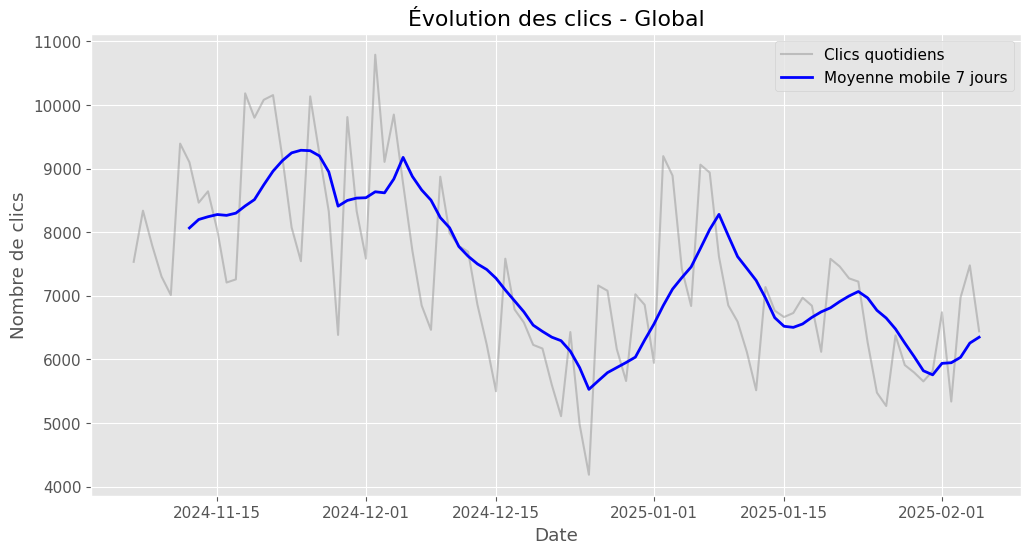


2. PERFORMANCE PAR JOUR DE LA SEMAINE
                Clics   CTR  Position
Jour_Semaine                         
Monday        8273.00  1.81     19.29
Tuesday       7722.77  1.84     19.48
Wednesday     7325.21  1.83     19.30
Thursday      7617.69  1.83     18.45
Friday        7475.15  1.72     19.27
Saturday      6798.38  1.63     22.01
Sunday        6248.23  1.69     23.98

Jour le plus performant: Monday (8273 clics en moyenne)


/var/folders/c4/gwh8dn4x50x2lbs830bg6dkc0000gn/T/ipykernel_50717/3361733962.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=performance_jour.index, y=performance_jour['Clics'], palette='Blues_d')


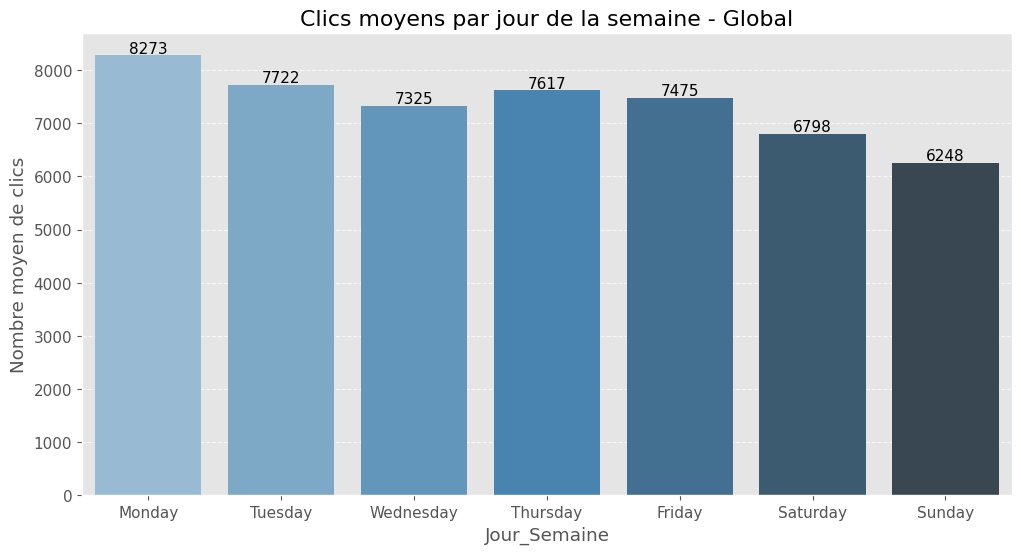

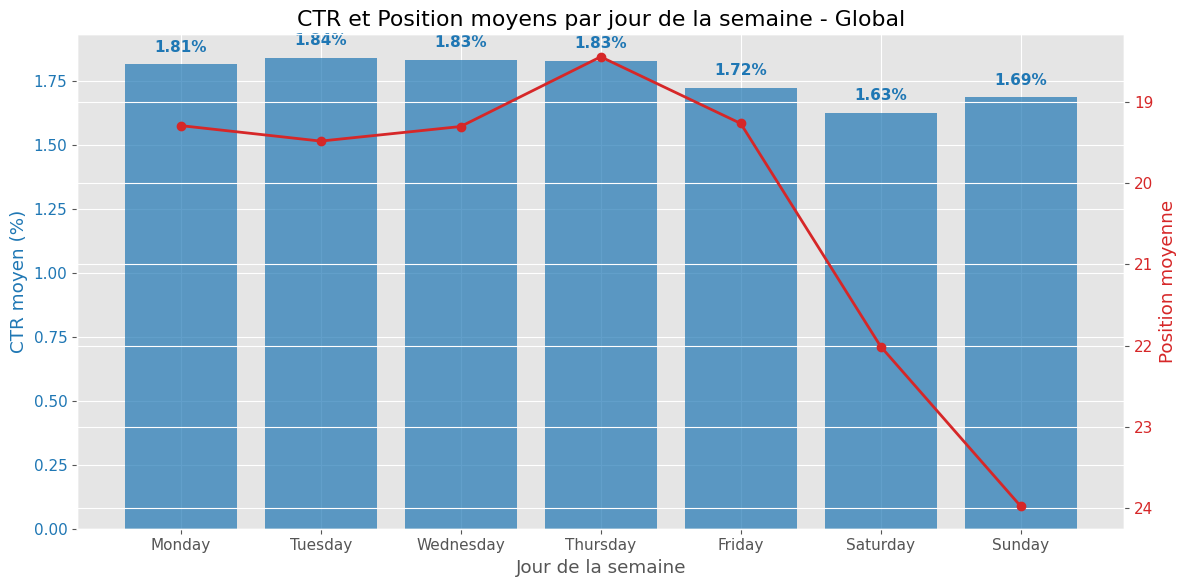


3. ÉVOLUTION PREMIÈRE VS. SECONDE MOITIÉ
      Métrique  Évolution (%)
0        Clics          -17.4
1  Impressions          -22.4
2          CTR            6.7
3     Position           14.4

Tendance globale des clics: à la baisse (-17.4%)


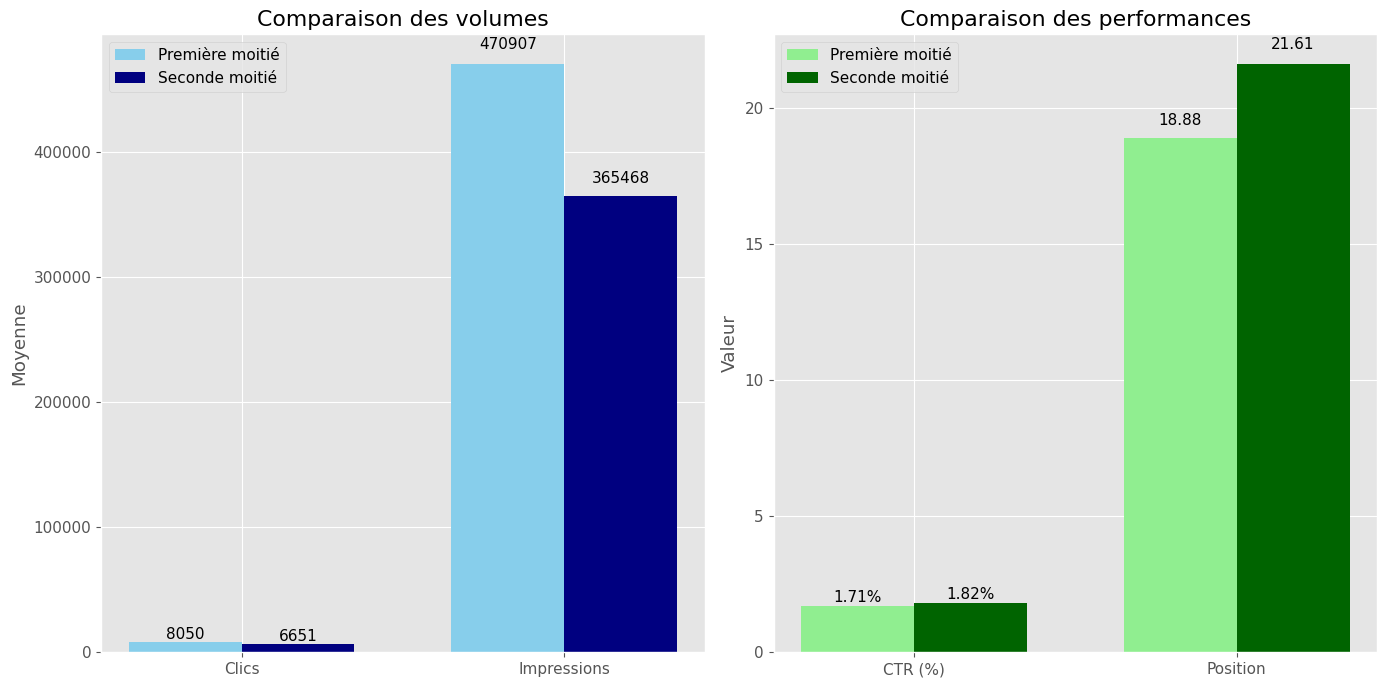

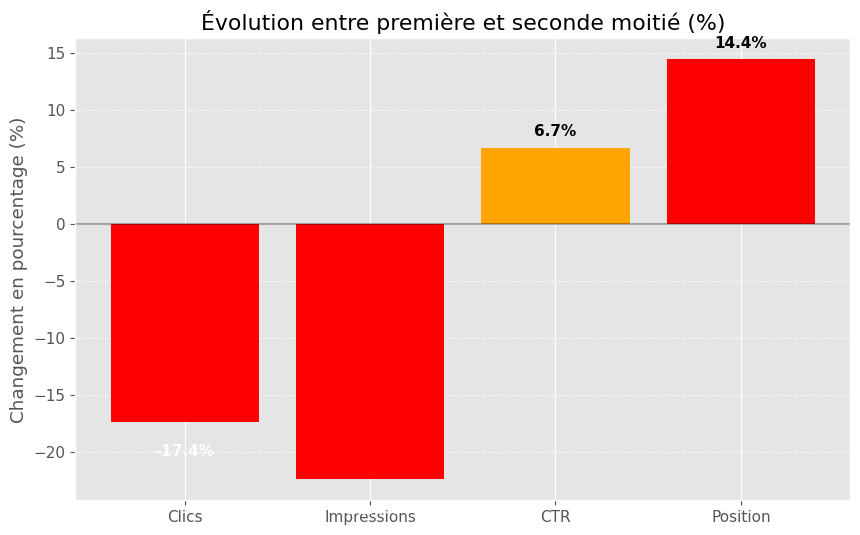


4. MEILLEURS ET PIRES JOURS
Top 3 des meilleurs jours:
           Date  Clics   CTR  Position
433  02/12/2024  10790  1.79     17.35
447  18/11/2024  10183  1.87     18.48
444  21/11/2024  10155  1.80     16.62

Top 3 des moins bons jours:
           Date  Clics   CTR  Position
410  25/12/2024   4189  1.80     22.01
411  24/12/2024   4978  1.72     20.76
413  22/12/2024   5109  1.44     26.18


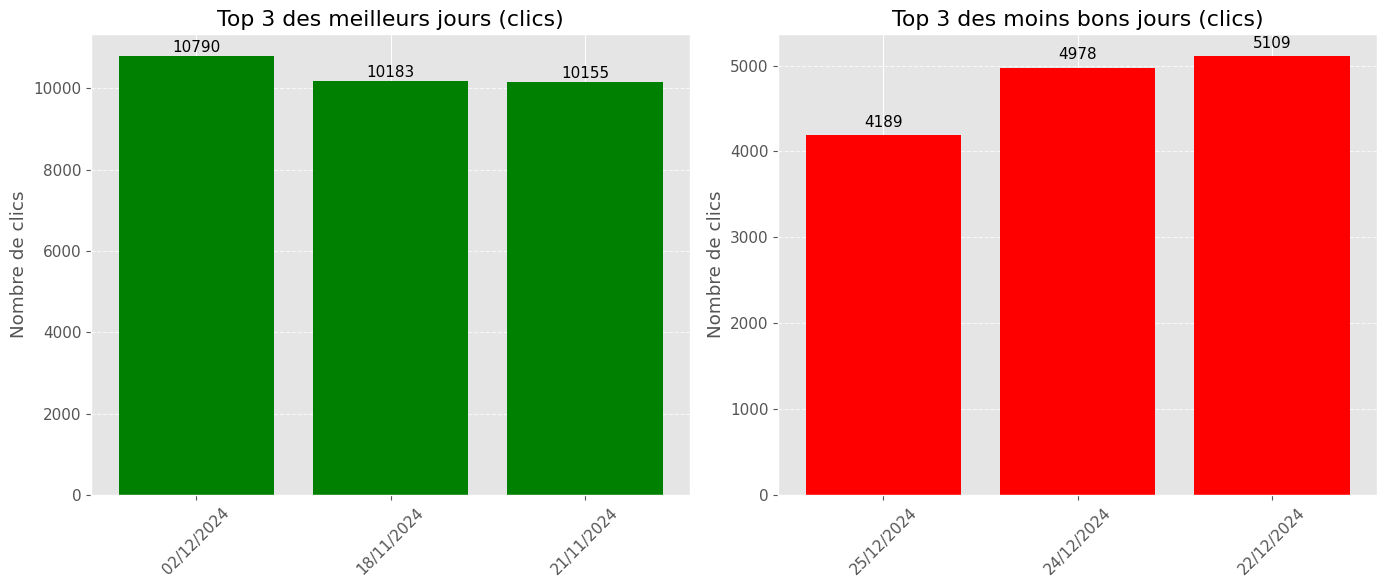


5. RÉSUMÉ DES ANALYSES
- Période analysée: 06/11/2024 - 05/02/2025
- Meilleur jour de la semaine: Monday (8273 clics)
- Tendance générale: à la baisse (-17.4%)
- Meilleur jour: 02/12/2024 (10790 clics)
- Pire jour: 25/12/2024 (4189 clics)


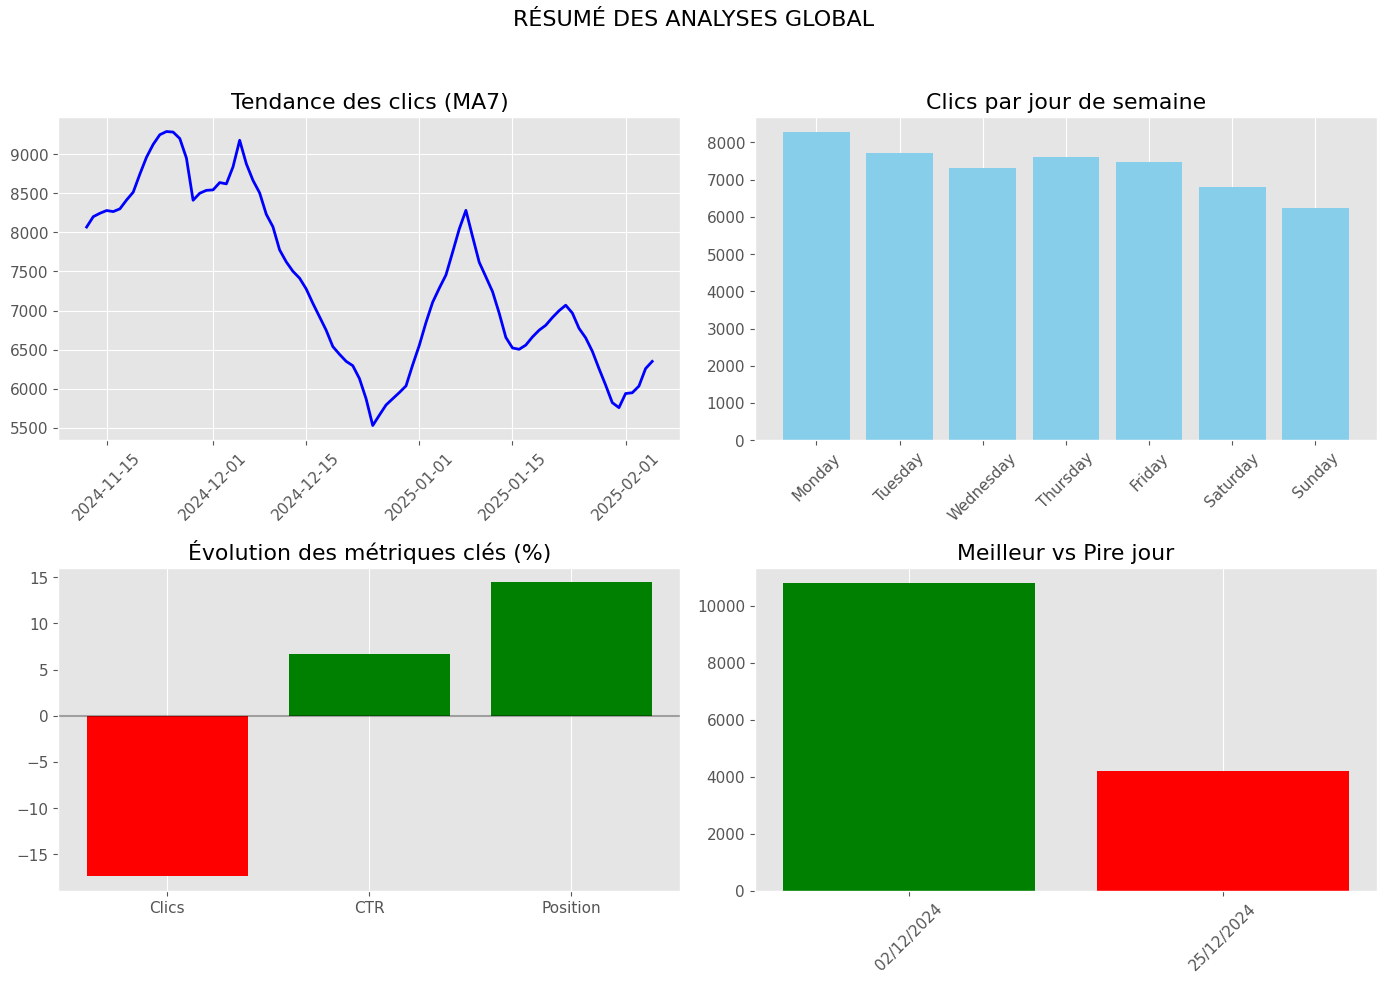

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta

# Configuration des graphiques
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

# Charger les données
fichier = "../Clean_data/Dates_all.xlsx"
df = pd.read_excel(fichier)

# Convertir les dates si nécessaire
if pd.api.types.is_numeric_dtype(df['Date']):
    date_origine = datetime(1899, 12, 30)
    df['Date'] = df['Date'].apply(lambda x: date_origine + timedelta(days=int(x)) if pd.notnull(x) else pd.NaT)

# Filtrer uniquement les données Global
global_data = df[df['Source'] == 'Global'].copy()
global_data = global_data.sort_values('Date')

# Ajouter le jour de la semaine
global_data['Jour_Semaine'] = global_data['Date'].dt.day_name()

#####################################################################
# 1. STATISTIQUES GÉNÉRALES
#####################################################################

print("=== ANALYSES ESSENTIELLES - GLOBAL ===")

print("\n1. STATISTIQUES GÉNÉRALES")
print(f"Période: {global_data['Date'].min().strftime('%d/%m/%Y')} - {global_data['Date'].max().strftime('%d/%m/%Y')}")
print(f"Clics totaux: {global_data['Clics'].sum():,}")
print(f"Impressions totales: {global_data['Impressions'].sum():,}")
print(f"CTR moyen: {global_data['CTR'].mean()*100:.2f}%")
print(f"Position moyenne: {global_data['Position'].mean():.2f}")

# Calcul de la moyenne mobile sur 7 jours pour lisser les fluctuations
global_data['Clics_MA7'] = global_data['Clics'].rolling(window=7).mean()

# Visualiser la tendance des clics
plt.figure(figsize=(12, 6))
plt.plot(global_data['Date'], global_data['Clics'], alpha=0.4, color='gray', label='Clics quotidiens')
plt.plot(global_data['Date'], global_data['Clics_MA7'], linewidth=2, color='blue', label='Moyenne mobile 7 jours')
plt.title('Évolution des clics - Global')
plt.xlabel('Date')
plt.ylabel('Nombre de clics')
plt.legend()
plt.grid(True)
plt.show()

#####################################################################
# 2. PERFORMANCE PAR JOUR DE LA SEMAINE
#####################################################################

# Calculer performance par jour de la semaine
jour_ordre = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
performance_jour = global_data.groupby('Jour_Semaine').agg({
    'Clics': 'mean',
    'Impressions': 'mean',
    'CTR': 'mean',
    'Position': 'mean'
})

# Réordonner les jours de la semaine
performance_jour = performance_jour.reindex(jour_ordre)

print("\n2. PERFORMANCE PAR JOUR DE LA SEMAINE")
performance_jour_display = performance_jour.copy()
performance_jour_display['CTR'] = performance_jour_display['CTR'] * 100  # En pourcentage
print(performance_jour_display[['Clics', 'CTR', 'Position']].round(2))
meilleur_jour = performance_jour['Clics'].idxmax()
print(f"\nJour le plus performant: {meilleur_jour} ({int(performance_jour.loc[meilleur_jour, 'Clics'])} clics en moyenne)")

# Visualiser les clics par jour de la semaine
plt.figure(figsize=(12, 6))
sns.barplot(x=performance_jour.index, y=performance_jour['Clics'], palette='Blues_d')
plt.title('Clics moyens par jour de la semaine - Global')
plt.ylabel('Nombre moyen de clics')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajouter les valeurs sur les barres
for i, v in enumerate(performance_jour['Clics']):
    plt.text(i, v + 50, f"{int(v)}", ha='center')

plt.show()

# Visualisation supplémentaire: CTR et Position par jour
fig, ax1 = plt.subplots(figsize=(12, 6))

# CTR sur l'axe principal
color = 'tab:blue'
ax1.set_xlabel('Jour de la semaine')
ax1.set_ylabel('CTR moyen (%)', color=color)
bars = ax1.bar(performance_jour.index, performance_jour['CTR'] * 100, color=color, alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)

# Ajouter les valeurs sur les barres pour CTR
for i, v in enumerate(performance_jour['CTR']):
    ax1.text(i, v * 100 + 0.05, f"{v*100:.2f}%", ha='center', color=color, fontweight='bold')

# Position sur l'axe secondaire
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Position moyenne', color=color)
ax2.plot(performance_jour.index, performance_jour['Position'], color=color, marker='o', linestyle='-', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
ax2.invert_yaxis()  # Position plus basse = meilleur

# Titre et affichage
plt.title('CTR et Position moyens par jour de la semaine - Global')
plt.tight_layout()
plt.show()

#####################################################################
# 3. ÉVOLUTION PREMIÈRE VS. SECONDE MOITIÉ
#####################################################################

# Diviser les données en deux moitiés
milieu = len(global_data) // 2
premiere_moitie = global_data.iloc[:milieu]
seconde_moitie = global_data.iloc[milieu:]

# Calculer les moyennes pour chaque moitié
comparaison = pd.DataFrame({
    'Première moitié': {
        'Clics': premiere_moitie['Clics'].mean(),
        'Impressions': premiere_moitie['Impressions'].mean(),
        'CTR': premiere_moitie['CTR'].mean() * 100,  # En pourcentage
        'Position': premiere_moitie['Position'].mean()
    },
    'Seconde moitié': {
        'Clics': seconde_moitie['Clics'].mean(),
        'Impressions': seconde_moitie['Impressions'].mean(),
        'CTR': seconde_moitie['CTR'].mean() * 100,  # En pourcentage
        'Position': seconde_moitie['Position'].mean()
    }
}).T

# Calculer l'évolution en pourcentage
evolution = pd.DataFrame({
    'Métrique': ['Clics', 'Impressions', 'CTR', 'Position'],
    'Évolution (%)': [
        ((seconde_moitie['Clics'].mean() / premiere_moitie['Clics'].mean()) - 1) * 100,
        ((seconde_moitie['Impressions'].mean() / premiere_moitie['Impressions'].mean()) - 1) * 100,
        ((seconde_moitie['CTR'].mean() / premiere_moitie['CTR'].mean()) - 1) * 100,
        ((seconde_moitie['Position'].mean() / premiere_moitie['Position'].mean()) - 1) * 100
    ]
})

print("\n3. ÉVOLUTION PREMIÈRE VS. SECONDE MOITIÉ")
print(evolution.round(1))
tendance = "à la hausse" if evolution.loc[0, 'Évolution (%)'] > 0 else "à la baisse"
print(f"\nTendance globale des clics: {tendance} ({evolution.loc[0, 'Évolution (%)']:.1f}%)")

# Visualiser la comparaison première vs seconde moitié
plt.figure(figsize=(14, 7))

# Sous-graphique pour les clics et impressions
plt.subplot(1, 2, 1)
metrics = ['Clics', 'Impressions']
x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, [comparaison.iloc[0]['Clics'], comparaison.iloc[0]['Impressions']], 
        width, label='Première moitié', color='skyblue')
plt.bar(x + width/2, [comparaison.iloc[1]['Clics'], comparaison.iloc[1]['Impressions']], 
        width, label='Seconde moitié', color='navy')

plt.ylabel('Moyenne')
plt.title('Comparaison des volumes')
plt.xticks(x, metrics)
plt.legend()

# Ajouter les étiquettes de valeur
for i, metric in enumerate(metrics):
    plt.text(i - width/2, comparaison.iloc[0][metric] * 1.02, 
             f"{int(comparaison.iloc[0][metric])}", 
             ha='center', va='bottom')
    plt.text(i + width/2, comparaison.iloc[1][metric] * 1.02, 
             f"{int(comparaison.iloc[1][metric])}", 
             ha='center', va='bottom')

# Sous-graphique pour CTR et Position
plt.subplot(1, 2, 2)
metrics = ['CTR (%)', 'Position']
x = np.arange(len(metrics))

plt.bar(x - width/2, [comparaison.iloc[0]['CTR'], comparaison.iloc[0]['Position']], 
        width, label='Première moitié', color='lightgreen')
plt.bar(x + width/2, [comparaison.iloc[1]['CTR'], comparaison.iloc[1]['Position']], 
        width, label='Seconde moitié', color='darkgreen')

plt.ylabel('Valeur')
plt.title('Comparaison des performances')
plt.xticks(x, metrics)
plt.legend()

# Ajouter les étiquettes de valeur
for i, metric in enumerate(['CTR', 'Position']):
    if metric == 'CTR':
        plt.text(i - width/2, comparaison.iloc[0][metric] * 1.02, 
                f"{comparaison.iloc[0][metric]:.2f}%", 
                ha='center', va='bottom')
        plt.text(i + width/2, comparaison.iloc[1][metric] * 1.02, 
                f"{comparaison.iloc[1][metric]:.2f}%", 
                ha='center', va='bottom')
    else:
        plt.text(i - width/2, comparaison.iloc[0][metric] * 1.02, 
                f"{comparaison.iloc[0][metric]:.2f}", 
                ha='center', va='bottom')
        plt.text(i + width/2, comparaison.iloc[1][metric] * 1.02, 
                f"{comparaison.iloc[1][metric]:.2f}", 
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Visualisation de l'évolution en pourcentage
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'orange', 'red']
evolution_colors = [colors[i] if val >= 0 else 'red' for i, val in enumerate(evolution['Évolution (%)'])]

bars = plt.bar(evolution['Métrique'], evolution['Évolution (%)'], color=evolution_colors)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.title('Évolution entre première et seconde moitié (%)')
plt.ylabel('Changement en pourcentage (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajouter les valeurs sur les barres
for i, bar in enumerate(bars):
    val = evolution['Évolution (%)'][i]
    plt.text(bar.get_x() + bar.get_width()/2, 
             val + (1 if val >= 0 else -3), 
             f"{val:.1f}%", 
             ha='center', 
             color='black' if val >= 0 else 'white',
             fontweight='bold')

plt.show()

#####################################################################
# 4. MEILLEURS ET PIRES JOURS
#####################################################################

# Identifier les meilleurs et pires jours
top_3_jours = global_data.nlargest(3, 'Clics')[['Date', 'Clics', 'Impressions', 'CTR', 'Position']]
top_3_jours['Date'] = top_3_jours['Date'].dt.strftime('%d/%m/%Y')
top_3_jours['CTR'] = top_3_jours['CTR'] * 100  # En pourcentage

bottom_3_jours = global_data.nsmallest(3, 'Clics')[['Date', 'Clics', 'Impressions', 'CTR', 'Position']]
bottom_3_jours['Date'] = bottom_3_jours['Date'].dt.strftime('%d/%m/%Y')
bottom_3_jours['CTR'] = bottom_3_jours['CTR'] * 100  # En pourcentage

print("\n4. MEILLEURS ET PIRES JOURS")
print("Top 3 des meilleurs jours:")
print(top_3_jours[['Date', 'Clics', 'CTR', 'Position']].round(2))
print("\nTop 3 des moins bons jours:")
print(bottom_3_jours[['Date', 'Clics', 'CTR', 'Position']].round(2))

# Visualisation des meilleurs et pires jours
plt.figure(figsize=(14, 6))

# Sous-graphique pour les meilleurs jours
plt.subplot(1, 2, 1)
plt.bar(top_3_jours['Date'], top_3_jours['Clics'], color='green')
plt.title('Top 3 des meilleurs jours (clics)')
plt.ylabel('Nombre de clics')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajouter les valeurs sur les barres
for i, v in enumerate(top_3_jours['Clics']):
    plt.text(i, v + 100, f"{int(v)}", ha='center')

# Sous-graphique pour les pires jours
plt.subplot(1, 2, 2)
plt.bar(bottom_3_jours['Date'], bottom_3_jours['Clics'], color='red')
plt.title('Top 3 des moins bons jours (clics)')
plt.ylabel('Nombre de clics')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajouter les valeurs sur les barres
for i, v in enumerate(bottom_3_jours['Clics']):
    plt.text(i, v + 100, f"{int(v)}", ha='center')

plt.tight_layout()
plt.show()

#####################################################################
# 5. RÉSUMÉ DES ANALYSES
#####################################################################

print("\n5. RÉSUMÉ DES ANALYSES")
print("- Période analysée:", global_data['Date'].min().strftime('%d/%m/%Y'), "-", global_data['Date'].max().strftime('%d/%m/%Y'))
print(f"- Meilleur jour de la semaine: {meilleur_jour} ({int(performance_jour.loc[meilleur_jour, 'Clics'])} clics)")
print(f"- Tendance générale: {tendance} ({evolution.loc[0, 'Évolution (%)']:.1f}%)")
print(f"- Meilleur jour: {top_3_jours.iloc[0]['Date']} ({int(top_3_jours.iloc[0]['Clics'])} clics)")
print(f"- Pire jour: {bottom_3_jours.iloc[0]['Date']} ({int(bottom_3_jours.iloc[0]['Clics'])} clics)")

# Créer une figure résumant les points clés
plt.figure(figsize=(14, 10))
plt.suptitle('RÉSUMÉ DES ANALYSES GLOBAL', fontsize=16, y=0.98)

# Sous-graphique 1: Tendance des clics
plt.subplot(2, 2, 1)
plt.plot(global_data['Date'], global_data['Clics_MA7'], linewidth=2, color='blue')
plt.title('Tendance des clics (MA7)')
plt.tick_params(axis='x', rotation=45)
plt.grid(True)

# Sous-graphique 2: Performance par jour
plt.subplot(2, 2, 2)
plt.bar(performance_jour.index, performance_jour['Clics'], color='skyblue')
plt.title('Clics par jour de semaine')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Sous-graphique 3: Évolution des métriques
plt.subplot(2, 2, 3)
metrics = ['Clics', 'CTR', 'Position']
values = evolution.loc[evolution['Métrique'].isin(metrics), 'Évolution (%)'].values
colors = ['green' if x >= 0 else 'red' for x in values]
plt.bar(metrics, values, color=colors)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.title('Évolution des métriques clés (%)')
plt.grid(axis='y')

# Sous-graphique 4: Top/Bottom jours
plt.subplot(2, 2, 4)
dates = list(top_3_jours['Date'][:1]) + list(bottom_3_jours['Date'][:1])
values = list(top_3_jours['Clics'][:1]) + list(bottom_3_jours['Clics'][:1])
colors = ['green', 'red']
plt.bar(dates, values, color=colors)
plt.title('Meilleur vs Pire jour')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

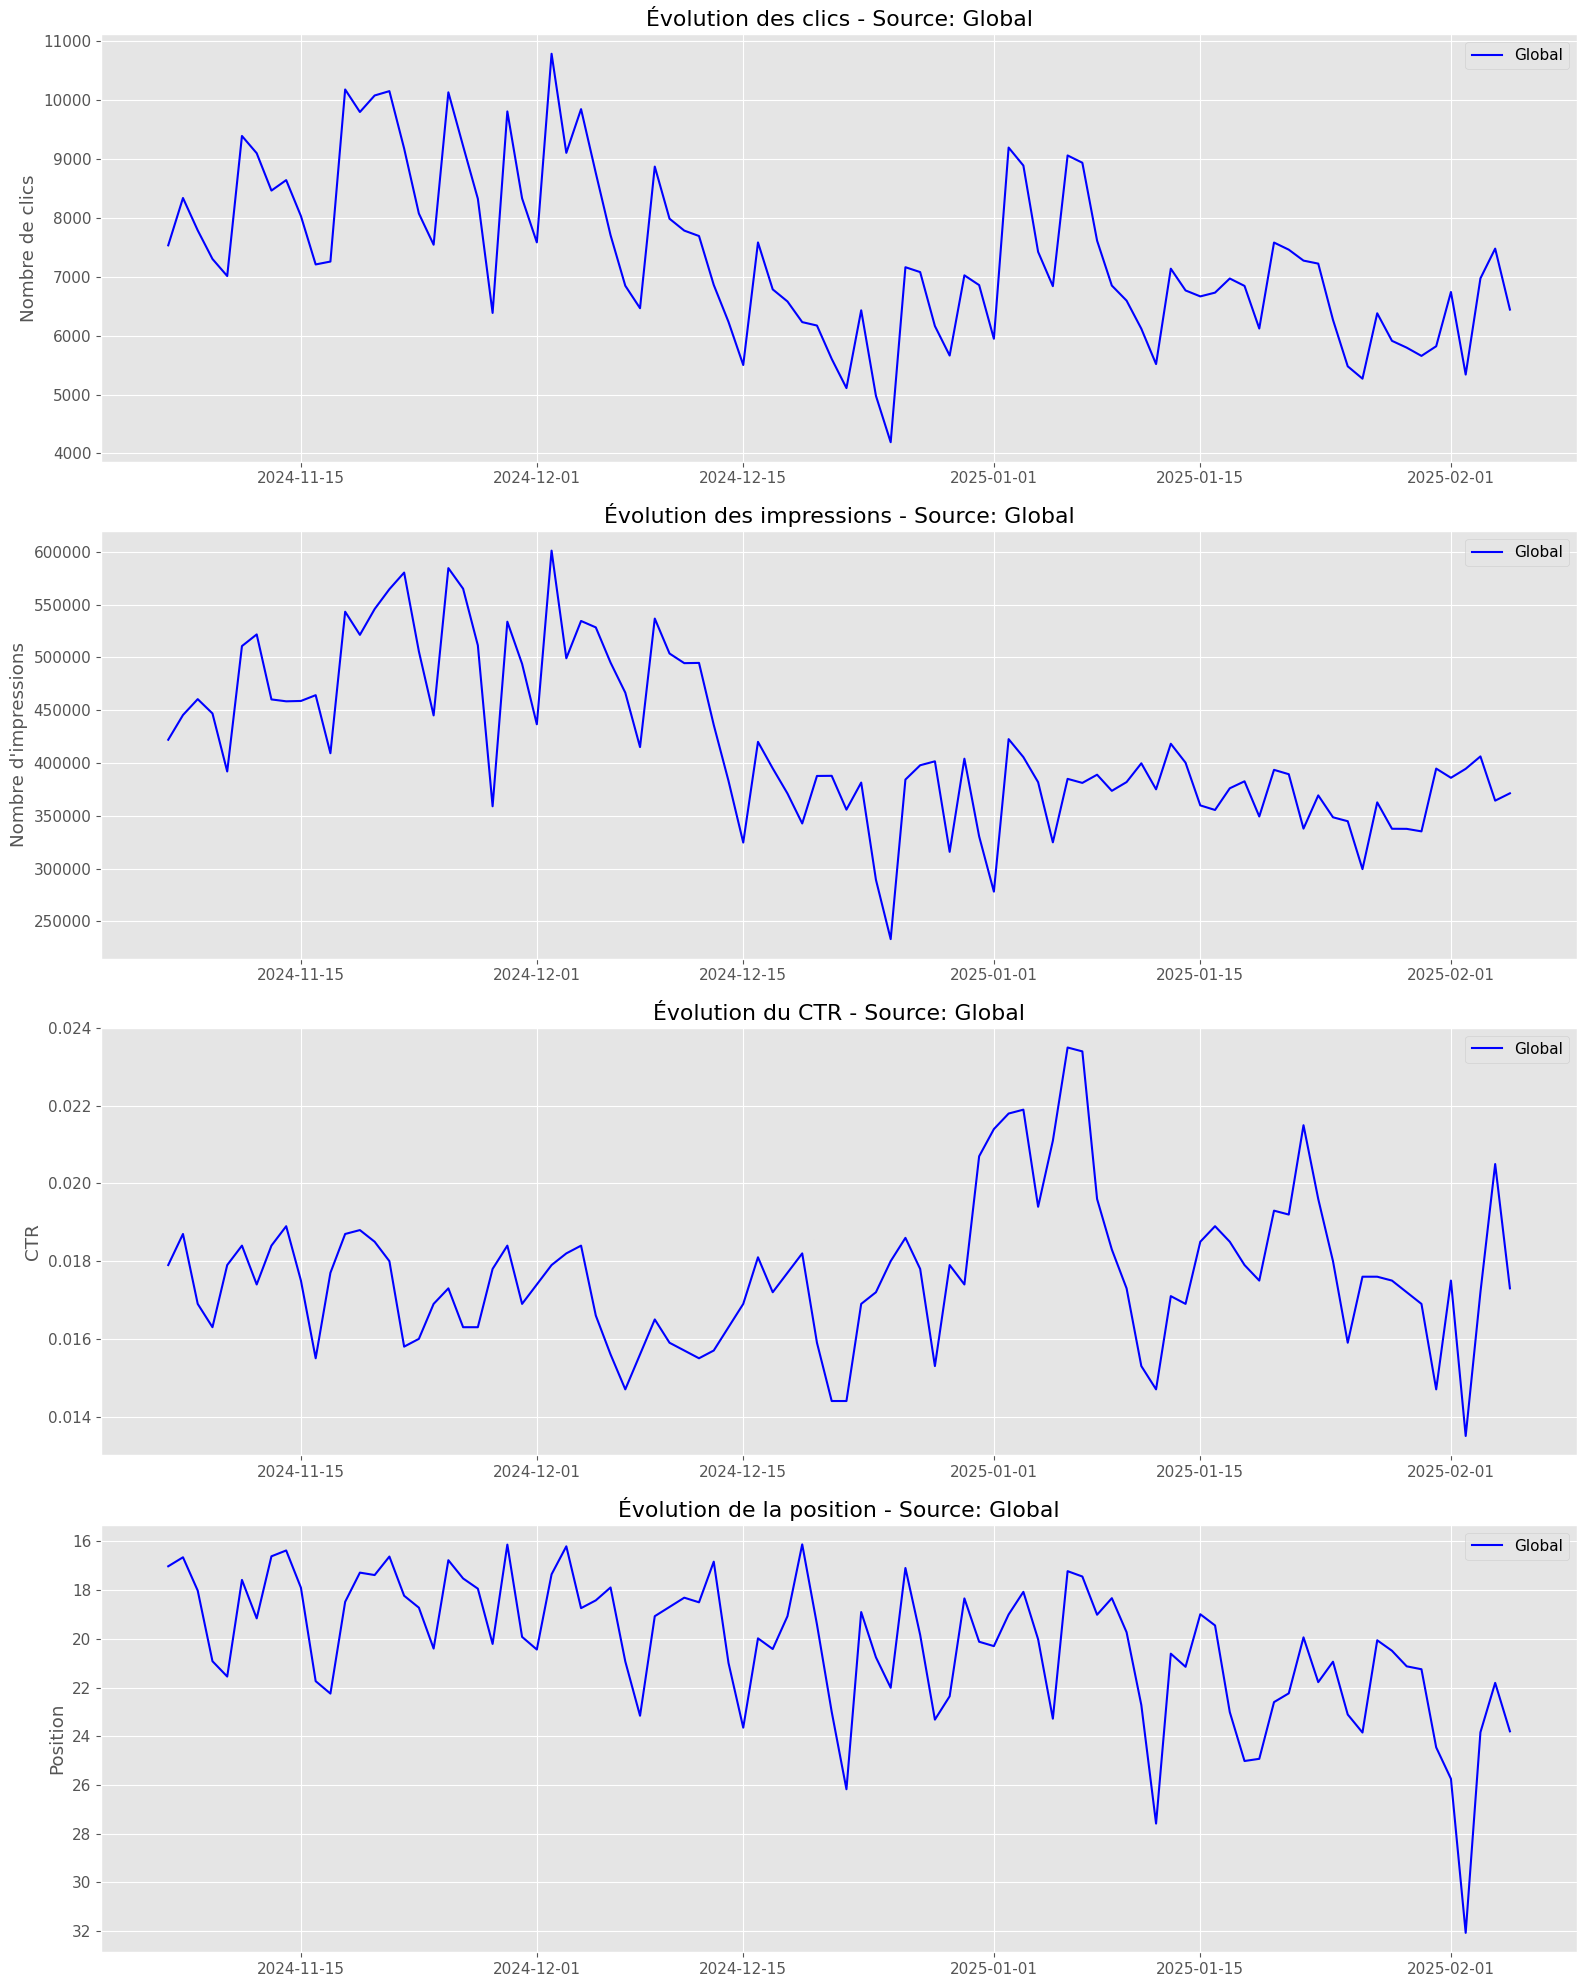

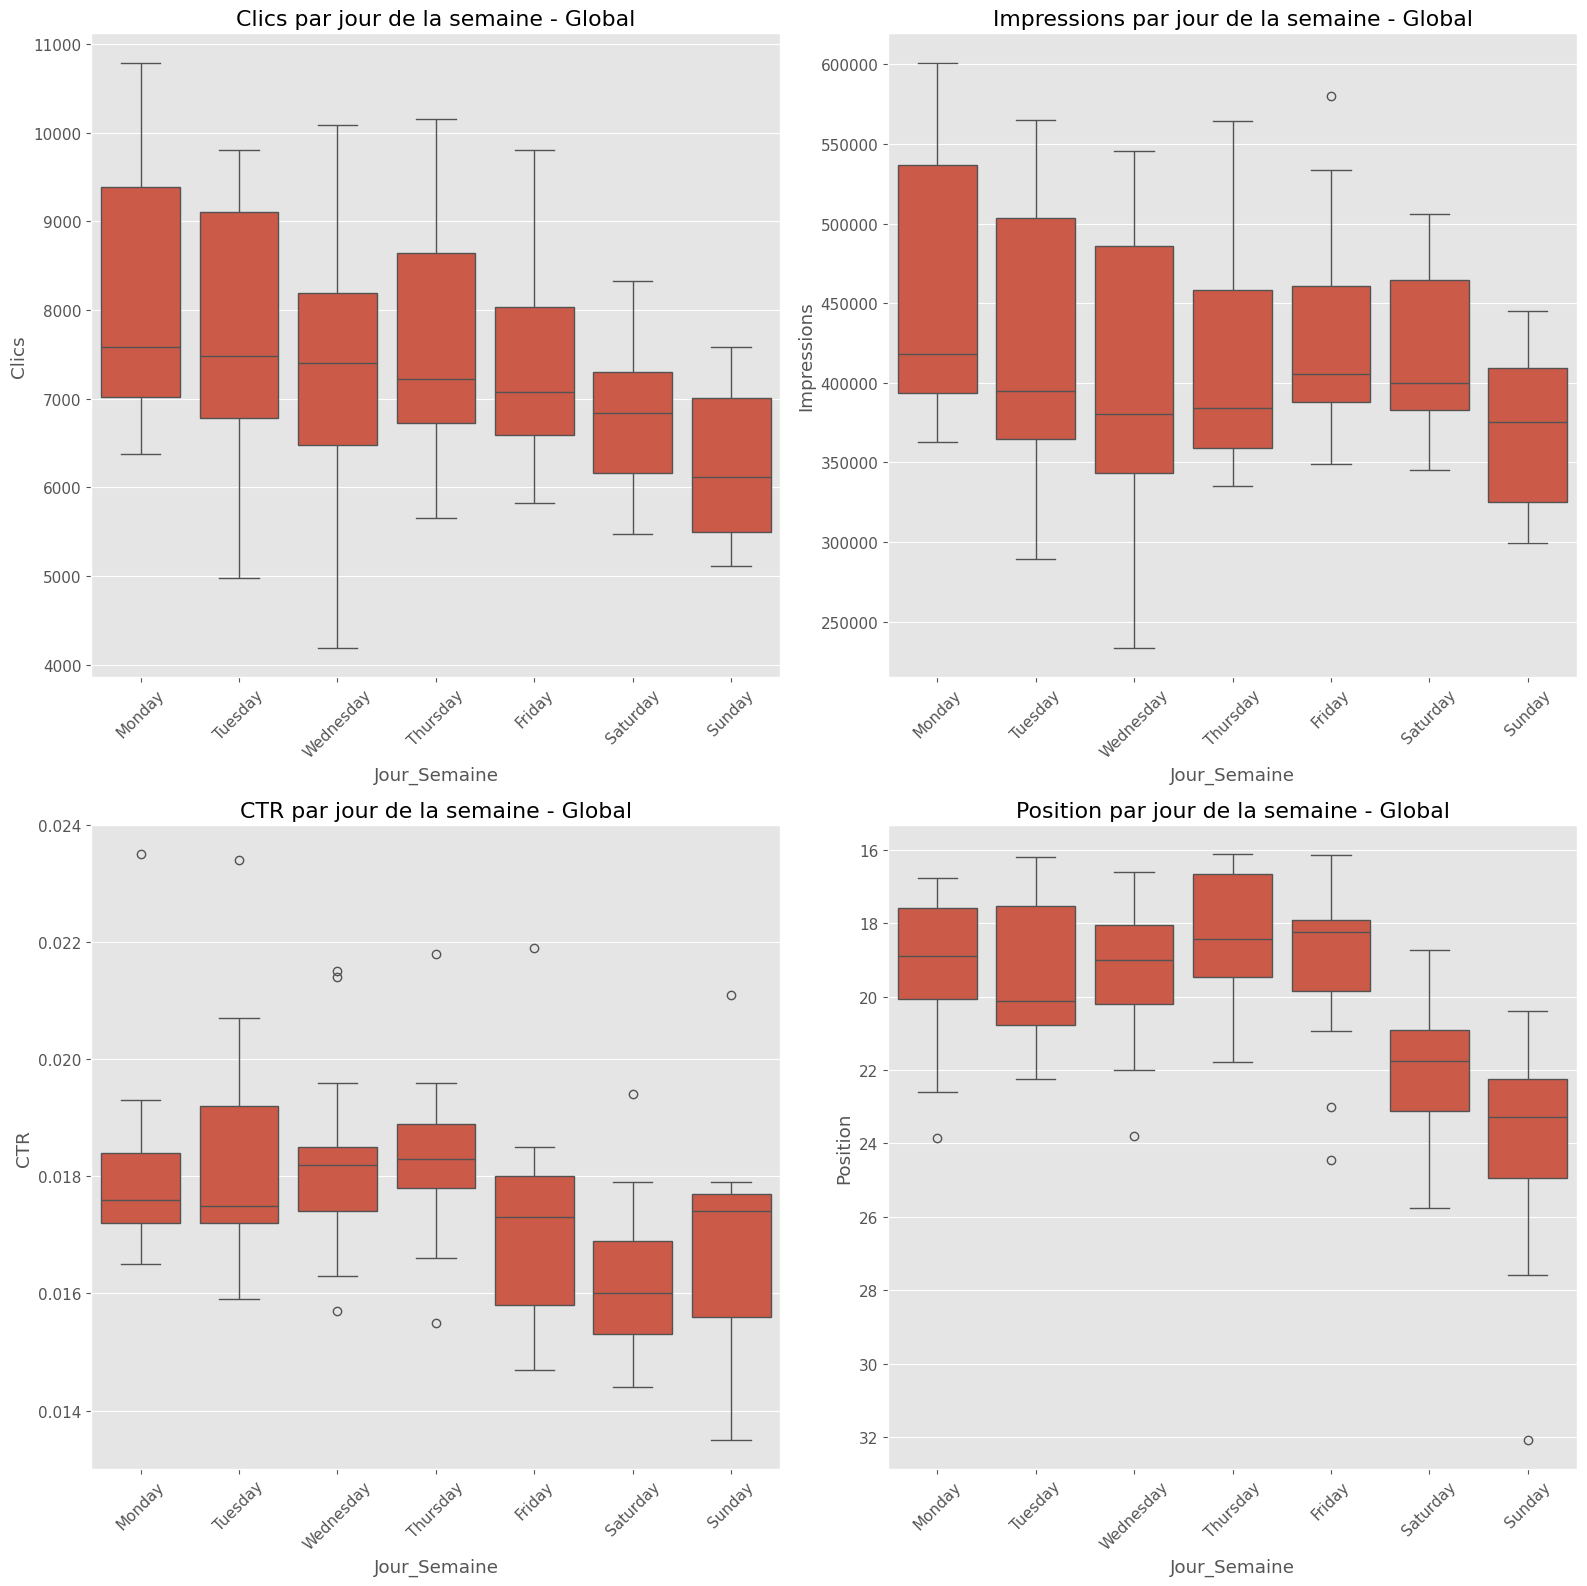

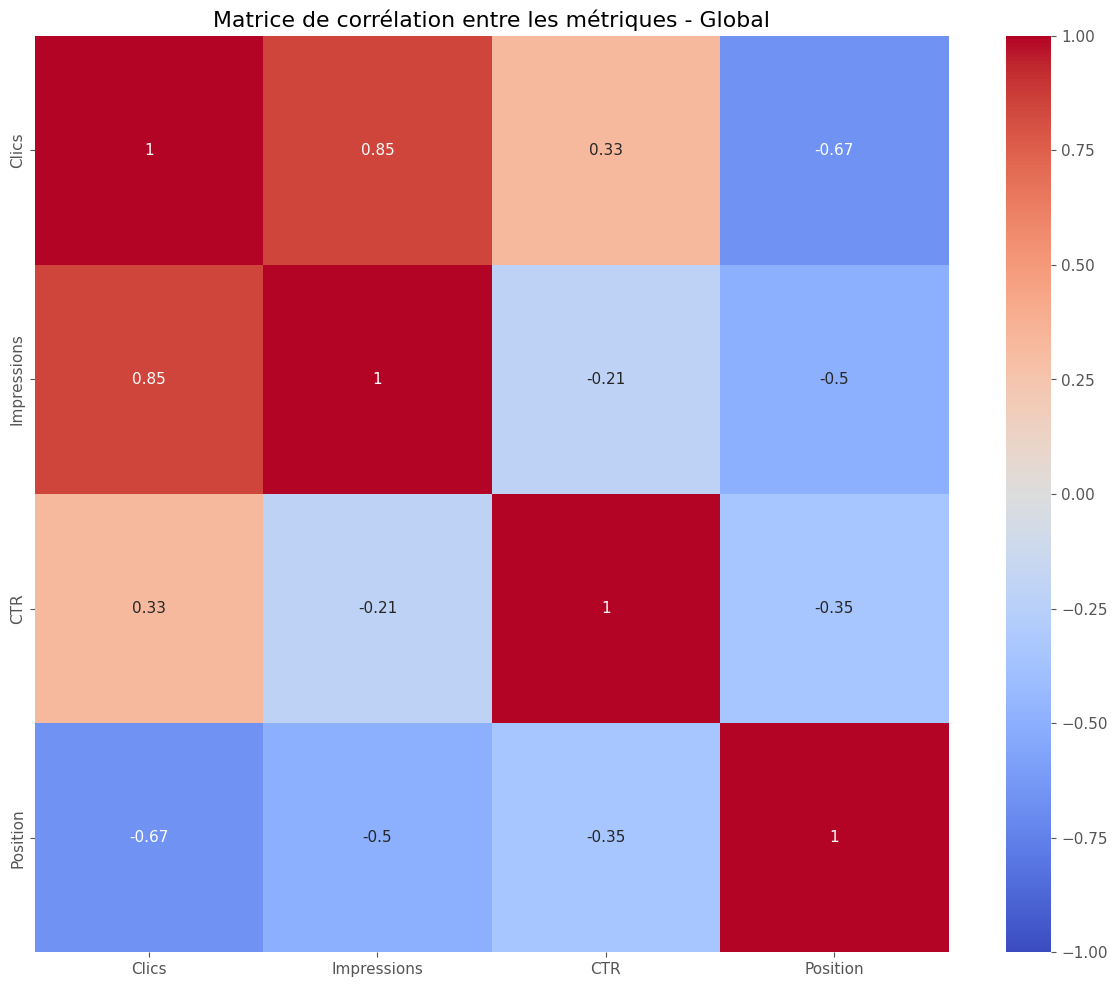

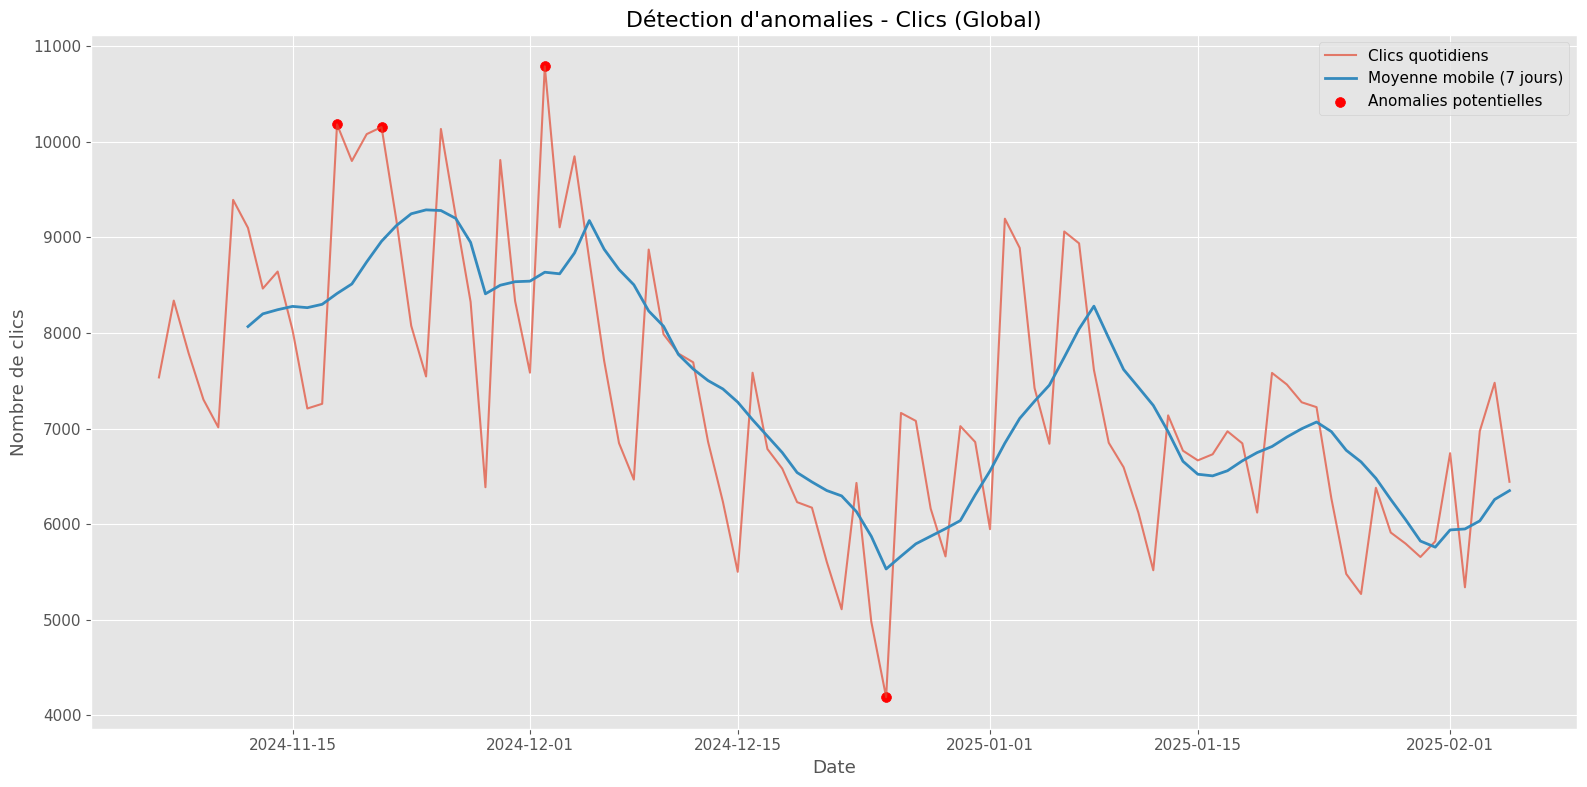


Anomalies détectées (clics) pour Global:
Date: 2024-11-18, Clics: 10183, Z-score: 2.02
Date: 2024-11-21, Clics: 10155, Z-score: 2.00
Date: 2024-12-02, Clics: 10790, Z-score: 2.46
Date: 2024-12-25, Clics: 4189, Z-score: -2.26


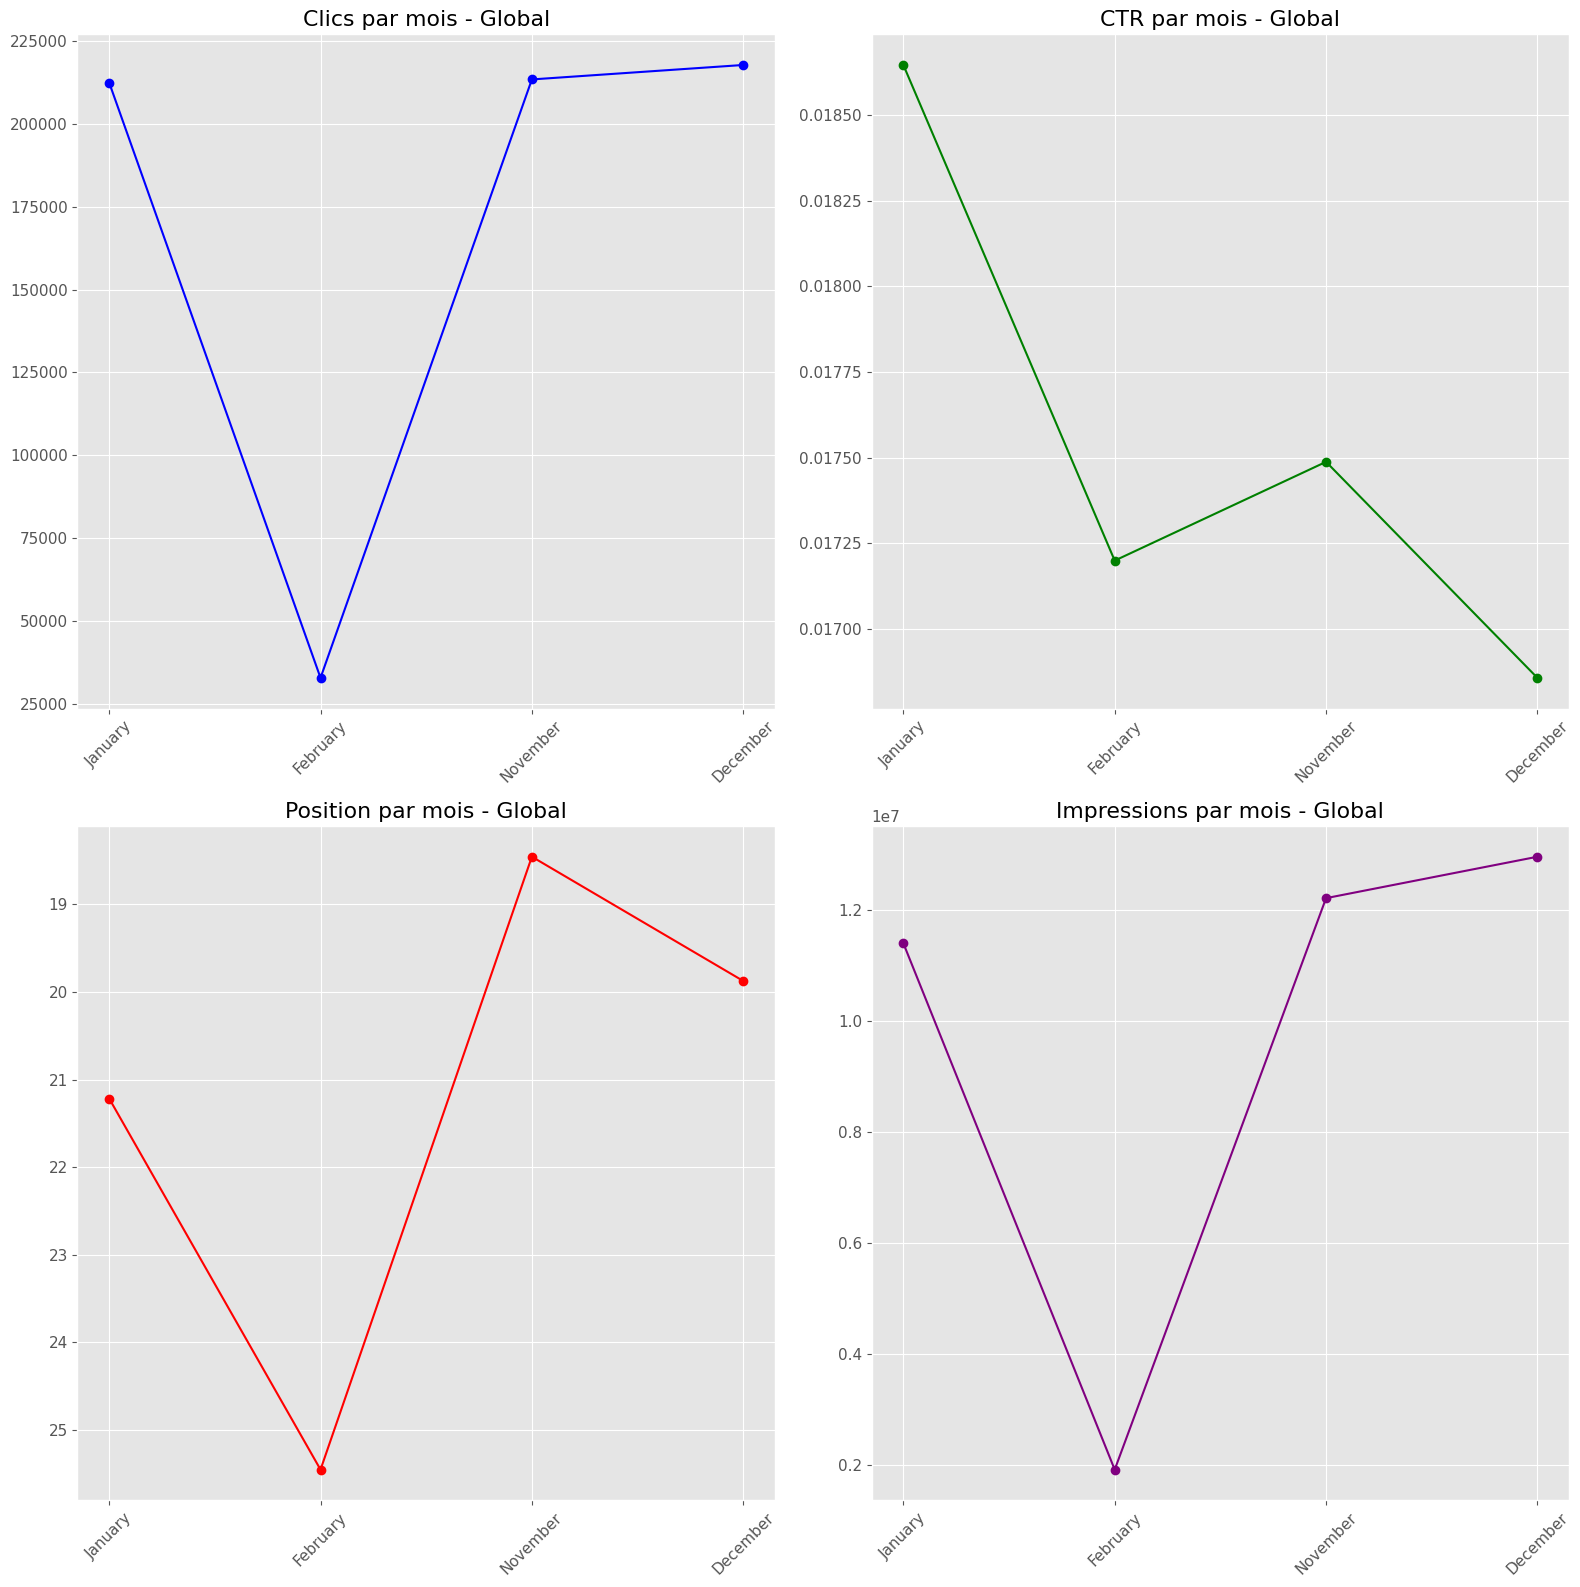


Performance globale - Source: Global
Total des clics: 676,311.0
Clics moyens par jour: 7351.2
Total des impressions: 38,473,290.0
Impressions moyennes par jour: 418187.9
CTR moyen: 1.77%
Position moyenne: 20.24

Évolution des clics: -17.4% (comparaison première/deuxième moitié)
Évolution de la position: -2.73 points (positif = amélioration)

Meilleur jour: 2024-12-02 - 10790 clics, 1.79% CTR
Pire jour: 2024-12-25 - 4189 clics, 1.80% CTR


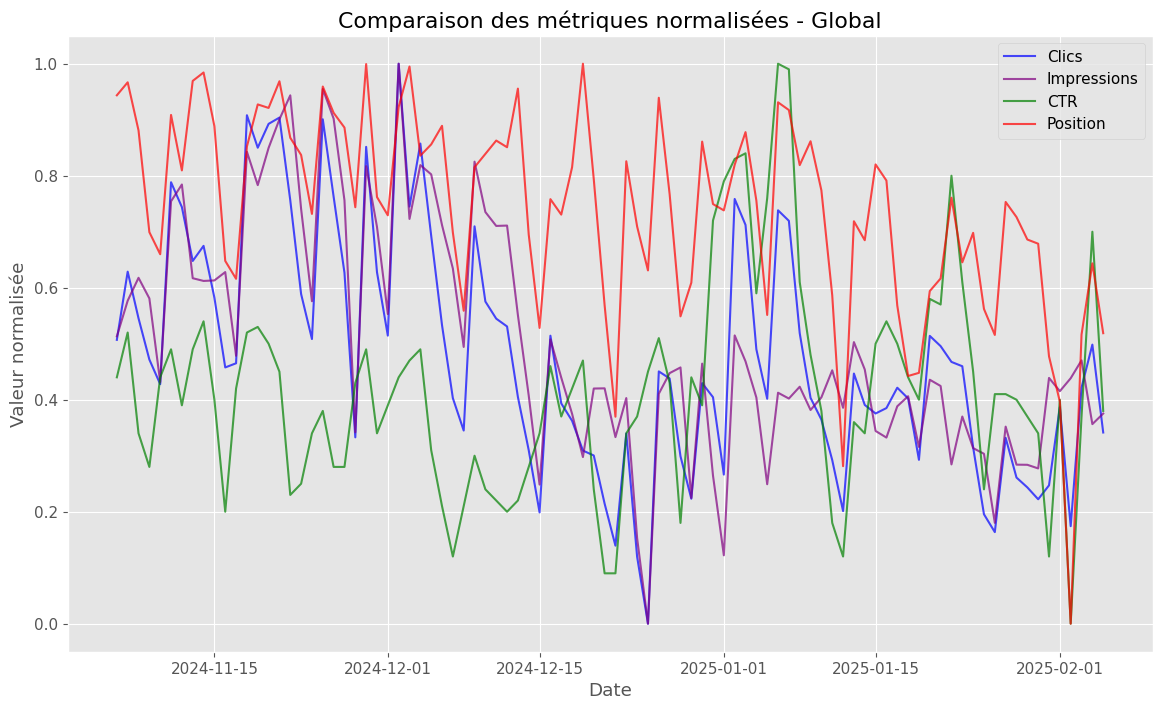

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta

# Configuration des graphiques
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

# Charger les données
fichier = "../Clean_data/Dates_all.xlsx"
df = pd.read_excel(fichier)

# Convertir les dates si nécessaire
if pd.api.types.is_numeric_dtype(df['Date']):
    date_origine = datetime(1899, 12, 30)
    df['Date'] = df['Date'].apply(lambda x: date_origine + timedelta(days=int(x)) if pd.notnull(x) else pd.NaT)

# Filtrer uniquement les données Global
global_data = df[df['Source'] == 'Global'].copy()
global_data = global_data.sort_values('Date')

# Ajouter des colonnes utiles pour l'analyse
global_data['Jour_Semaine'] = global_data['Date'].dt.day_name()
global_data['Mois'] = global_data['Date'].dt.month_name()
global_data['Semaine'] = global_data['Date'].dt.isocalendar().week

#####################################################################
# 1. ÉVOLUTION TEMPORELLE DES MÉTRIQUES CLÉS
#####################################################################

# Graphique des métriques clés
plt.figure(figsize=(16, 20))

# 1.1 Évolution des clics
plt.subplot(4, 1, 1)
plt.plot(global_data['Date'], global_data['Clics'], label='Global', color='blue')
plt.title('Évolution des clics - Source: Global')
plt.ylabel('Nombre de clics')
plt.legend()
plt.grid(True)

# 1.2 Évolution des impressions
plt.subplot(4, 1, 2)
plt.plot(global_data['Date'], global_data['Impressions'], label='Global', color='blue')
plt.title('Évolution des impressions - Source: Global')
plt.ylabel('Nombre d\'impressions')
plt.legend()
plt.grid(True)

# 1.3 Évolution du CTR
plt.subplot(4, 1, 3)
plt.plot(global_data['Date'], global_data['CTR'], label='Global', color='blue')
plt.title('Évolution du CTR - Source: Global')
plt.ylabel('CTR')
plt.legend()
plt.grid(True)

# 1.4 Évolution de la position
plt.subplot(4, 1, 4)
plt.plot(global_data['Date'], global_data['Position'], label='Global', color='blue')
plt.title('Évolution de la position - Source: Global')
plt.ylabel('Position')
plt.gca().invert_yaxis()  # Inverser l'axe y pour une meilleure lisibilité
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#####################################################################
# 2. ANALYSE DES TENDANCES PAR JOUR DE LA SEMAINE
#####################################################################

plt.figure(figsize=(16, 16))

# Ordre des jours de la semaine
jours_ordre = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 2.1 Clics par jour de la semaine
plt.subplot(2, 2, 1)
sns.boxplot(x='Jour_Semaine', y='Clics', data=global_data, order=jours_ordre)
plt.title('Clics par jour de la semaine - Global')
plt.xticks(rotation=45)

# 2.2 Impressions par jour de la semaine
plt.subplot(2, 2, 2)
sns.boxplot(x='Jour_Semaine', y='Impressions', data=global_data, order=jours_ordre)
plt.title('Impressions par jour de la semaine - Global')
plt.xticks(rotation=45)

# 2.3 CTR par jour de la semaine
plt.subplot(2, 2, 3)
sns.boxplot(x='Jour_Semaine', y='CTR', data=global_data, order=jours_ordre)
plt.title('CTR par jour de la semaine - Global')
plt.xticks(rotation=45)

# 2.4 Position par jour de la semaine
plt.subplot(2, 2, 4)
sns.boxplot(x='Jour_Semaine', y='Position', data=global_data, order=jours_ordre)
plt.title('Position par jour de la semaine - Global')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()  # Inverser l'axe y pour une meilleure lisibilité

plt.tight_layout()
plt.show()

#####################################################################
# 3. ANALYSE DES CORRÉLATIONS ENTRE MÉTRIQUES
#####################################################################

plt.figure(figsize=(12, 10))
# Calculer la matrice de corrélation
correlation = global_data[['Clics', 'Impressions', 'CTR', 'Position']].corr()
# Afficher la heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de corrélation entre les métriques - Global')
plt.tight_layout()
plt.show()

#####################################################################
# 4. DÉTECTION D'ANOMALIES
#####################################################################

# Calcul des moyennes mobiles sur 7 jours
global_data['Clics_MA7'] = global_data['Clics'].rolling(window=7).mean()
global_data['Impressions_MA7'] = global_data['Impressions'].rolling(window=7).mean()
global_data['CTR_MA7'] = global_data['CTR'].rolling(window=7).mean()
global_data['Position_MA7'] = global_data['Position'].rolling(window=7).mean()

# Calcul des z-scores
global_data['Clics_Zscore'] = (global_data['Clics'] - global_data['Clics'].mean()) / global_data['Clics'].std()
global_data['Impressions_Zscore'] = (global_data['Impressions'] - global_data['Impressions'].mean()) / global_data['Impressions'].std()

# Détection des anomalies pour les clics
plt.figure(figsize=(16, 8))
plt.plot(global_data['Date'], global_data['Clics'], label='Clics quotidiens', alpha=0.7)
plt.plot(global_data['Date'], global_data['Clics_MA7'], label='Moyenne mobile (7 jours)', linewidth=2)

# Identifier les anomalies (z-score > 2)
anomalies = global_data[abs(global_data['Clics_Zscore']) > 2]
plt.scatter(anomalies['Date'], anomalies['Clics'], color='red', s=50, label='Anomalies potentielles')

plt.title('Détection d\'anomalies - Clics (Global)')
plt.xlabel('Date')
plt.ylabel('Nombre de clics')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Afficher les anomalies détectées
if not anomalies.empty:
    print("\nAnomalies détectées (clics) pour Global:")
    for _, row in anomalies.iterrows():
        print(f"Date: {row['Date'].strftime('%Y-%m-%d')}, Clics: {row['Clics']}, Z-score: {row['Clics_Zscore']:.2f}")
else:
    print("\nAucune anomalie significative détectée pour les clics (Global).")

#####################################################################
# 5. ANALYSE DE LA SAISONNALITÉ MENSUELLE
#####################################################################

# Agréger les données par mois
monthly_data = global_data.groupby('Mois').agg({
    'Clics': 'sum',
    'Impressions': 'sum',
    'CTR': 'mean',
    'Position': 'mean'
}).reset_index()

# Ordre des mois
mois_ordre = ['January', 'February', 'March', 'April', 'May', 'June', 
              'July', 'August', 'September', 'October', 'November', 'December']

# Graphiques de saisonnalité mensuelle
plt.figure(figsize=(16, 16))

# 5.1 Clics par mois
plt.subplot(2, 2, 1)
monthly_sorted = monthly_data.set_index('Mois').reindex(mois_ordre).reset_index()
monthly_sorted = monthly_sorted.dropna()  # Éliminer les mois sans données
plt.plot(monthly_sorted['Mois'], monthly_sorted['Clics'], 'o-', color='blue')
plt.title('Clics par mois - Global')
plt.xticks(rotation=45)
plt.grid(True)

# 5.2 CTR par mois
plt.subplot(2, 2, 2)
plt.plot(monthly_sorted['Mois'], monthly_sorted['CTR'], 'o-', color='green')
plt.title('CTR par mois - Global')
plt.xticks(rotation=45)
plt.grid(True)

# 5.3 Position par mois
plt.subplot(2, 2, 3)
plt.plot(monthly_sorted['Mois'], monthly_sorted['Position'], 'o-', color='red')
plt.title('Position par mois - Global')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()  # Inverser l'axe y
plt.grid(True)

# 5.4 Impressions par mois
plt.subplot(2, 2, 4)
plt.plot(monthly_sorted['Mois'], monthly_sorted['Impressions'], 'o-', color='purple')
plt.title('Impressions par mois - Global')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

#####################################################################
# 6. COMPARAISON DES PERFORMANCES
#####################################################################

# Statistiques de performance
source_stats = global_data.agg({
    'Clics': ['sum', 'mean'],
    'Impressions': ['sum', 'mean'],
    'CTR': 'mean',
    'Position': 'mean'
})

# Mise en forme pour affichage
print("\nPerformance globale - Source: Global")
print(f"Total des clics: {source_stats['Clics']['sum']:,}")
print(f"Clics moyens par jour: {source_stats['Clics']['mean']:.1f}")
print(f"Total des impressions: {source_stats['Impressions']['sum']:,}")
print(f"Impressions moyennes par jour: {source_stats['Impressions']['mean']:.1f}")
print(f"CTR moyen: {source_stats['CTR']['mean']*100:.2f}%")
print(f"Position moyenne: {source_stats['Position']['mean']:.2f}")

# Évolution dans le temps (première moitié vs deuxième moitié)
mid_point = len(global_data) // 2
first_half = global_data.iloc[:mid_point]
second_half = global_data.iloc[mid_point:]

clics_evolution = ((second_half['Clics'].mean() / first_half['Clics'].mean()) - 1) * 100
position_evolution = first_half['Position'].mean() - second_half['Position'].mean()

print(f"\nÉvolution des clics: {clics_evolution:.1f}% (comparaison première/deuxième moitié)")
print(f"Évolution de la position: {position_evolution:.2f} points (positif = amélioration)")

# Afficher le meilleur et le pire jour
best_day = global_data.loc[global_data['Clics'].idxmax()]
worst_day = global_data.loc[global_data['Clics'].idxmin()]

print(f"\nMeilleur jour: {best_day['Date'].strftime('%Y-%m-%d')} - {best_day['Clics']} clics, {best_day['CTR']:.2%} CTR")
print(f"Pire jour: {worst_day['Date'].strftime('%Y-%m-%d')} - {worst_day['Clics']} clics, {worst_day['CTR']:.2%} CTR")

# Graphique de comparaison des métriques normalisées
plt.figure(figsize=(14, 8))

# Normaliser les données pour faciliter la comparaison
metrics = ['Clics', 'Impressions', 'CTR', 'Position']
colors = ['blue', 'purple', 'green', 'red']

for i, metric in enumerate(metrics):
    # Normaliser sur une échelle de 0 à 1
    min_val = global_data[metric].min()
    max_val = global_data[metric].max()
    normalized = (global_data[metric] - min_val) / (max_val - min_val)
    
    # Pour la position, inverser la normalisation (plus bas = meilleur)
    if metric == 'Position':
        normalized = 1 - normalized
    
    plt.plot(global_data['Date'], normalized, 
            color=colors[i], label=f'{metric}', alpha=0.7)

plt.title('Comparaison des métriques normalisées - Global')
plt.xlabel('Date')
plt.ylabel('Valeur normalisée')
plt.legend()
plt.grid(True)
plt.show()